# Восстановление золота из руды

<h2>  <a class="tocSkip"> </h2>

<a name="1"></a>
## Содержание

1  [Содержание](#1)

2  [Описание проекта](#2)

*    2.1  [Цель проекта](#21)
*    2.2  [Задачи проекта](#22)
*    2.3  [Технологический процесс](#23)
*    2.4  [Описание данных](#24)
*    2.5  [Расчёты](#25)

   *    2.5.1  [Эффективность обогащения](#251)
   *    2.5.2  [Метрика качества *sMAPE*](#252)
   *    2.5.3  [Итоговая метрика *final_sMAPE*](#253)
    
*    2.6  [План работы](#26)

3  [Подготовка данных](#3)

*    3.1  [Исследование данных](#31)

   *    3.1.1  [Обучающая выборка](#311)
   *    3.1.2  [Тестовая выборка](#312)
   *    3.1.3  [Исходные данные](#313)
   *    3.1.4  [Дополнение](#314)
   *    3.1.5  [Вывод по п. 3.1](#315)    
    
*    3.2  [Расчёт эффективности обогащения](#32)
*    3.3  [Анализ признаков, недоступных в тестовой выборке](#33)
*    3.4  [Предобработка данных](#34)
*    3.5  [Вывод](#35)

4  [Анализ данных](#4)

*    4.1  [Распределение концентрации металлов](#41)
*    4.2  [Распределение размеров гранул сырья](#42)

   *    4.2.1  [Гранулы исходного сырья](#421)
   *    4.2.2  [Вывод по п. 4.2](#422)
    
*    4.3  [Суммарная концентрация металлов на разных стадиях](#43)
*    4.4  [Вывод](#44)

5  [Обучение моделей](#5)

*    5.1  [Функция для вычисления *final_sMAPE*](#51)
*    5.2  [Разделение обучающей выборки на признаки и таргет](#52)
*    5.3  [`DecisionTreeRegressor` + `GridSearchCV`](#53)
    
   *    5.3.1  [Черновой концентрат](#531)
   *    5.3.2  [Финальный концентрат](#532)
   *    5.3.3  [Итоговая метрика *final_sMAPE*](#533)
    
*    5.4  [`RandomForestRegressor` + `GridSearchCV`](#54)
    
   *    5.4.1  [Черновой концентрат](#541)
   *    5.4.2  [Финальный концентрат](#542)
   *    5.4.3  [Итоговая метрика *final_sMAPE*](#543)
        
*    5.5  [`LinearRegression` + `cross_val_score`](#55)
    
   *    5.5.1  [Черновой концентрат](#551)
   *    5.5.2  [Финальный концентрат](#552)
   *    5.5.3  [Итоговая метрика *final_sMAPE*](#553)
        
*    5.6  [Сравнение моделей](#56)        
*    5.7  [Вывод](#57)
    
6  [Тестирование лучшей модели](#6)

*    6.1  [Качество модели](#61)

   *    6.1.1  [Черновой концентрат](#611)
   *    6.1.2  [Финальный концентрат](#612)
    
*    6.2  [Итоговая метрика *final_sMAPE*](#62)
*    6.3  [`DummyRegressor`](#63)

   *    6.3.1  [Черновой концентрат](#631)
   *    6.3.2  [Финальный концентрат](#632)
    
*    6.4  [Итоговое сравнение моделей](#64)
*    6.5  [Вывод](#65)

7  [Общий вывод](#7)

## Описание проекта
<a name="2"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Подготовим прототип модели машинного обучения для компании ["Цифра"](https://www.zyfra.com/ru/). Данная компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, будем обращаться к библиотекам `pandas`, `matplotlib` и `sklearn`. Нам поможет их документация.

### Цель проекта
<a name="21"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Провести исследование с целью построения модели машинного обучения, которая поможет прогнозировать коэффициент восстановления золота из золотосодержащей руды.

Результаты исследования помогут оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

### Задачи проекта
<a name="22"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Изучить данные.
2. Подготовить данные.
3. Выполнить анализ данных.
4. Обучить модели.
5. Протестировать лучшую модель.
6. Написать общий вывод.
   
Нам пригодятся формулы метрик качества.

### Технологический процесс
<a name="23"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Как золото получают из руды? Изучим внимательно стадии процесса.

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

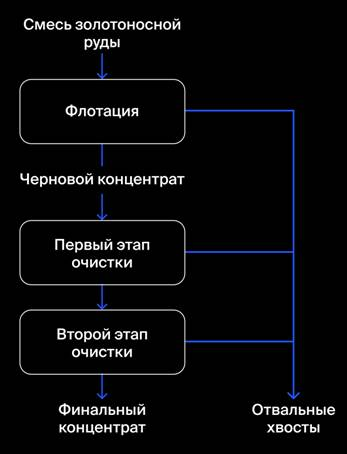

Опишем каждую стадию:

**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и "отвальные хвосты", то есть остатки продукта с низкой концентрацией ценных металлов.

На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

### Описание данных
<a name="24"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В нашем распоряжении сырые данные с параметрами добычи и очистки, предоставленные компанией ["Цифра"](https://www.zyfra.com/ru/).

Данные находятся в трёх файлах:
- `gold_industry_train.csv` - обучающая выборка;
- `gold_industry_test.csv` - тестовая выборка;
- `gold_industry_full.csv` - исходные данные.

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. **Также в тестовом наборе нет целевых признаков.**

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверим их на корректность.

**Целевые признаки:**

- `rougher.output.recovery` - эффективность обогащения чернового концентрата;
- `final.output.recovery` - эффективность обогащения финального концентрата.

**Технологический процесс**

- `Rougher feed` — исходное сырье
- `Rougher additions` (или *reagent additions*) — флотационные реагенты: *Xanthate*, *Sulphate*, *Depressant*
   - *Xanthate* **— ксантогенат (промотер, или активатор флотации);
   - *Sulphate* — сульфат (на данном производстве сульфид натрия);
   - *Depressant* — депрессант (силикат натрия).
- `Rougher process` (англ. "грубый процесс") — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота

**Параметры этапов**

- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи


**Наименование признаков** имеет такой вид:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики

### Расчёты
<a name="25"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

#### Эффективность обогащения
<a name="251"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Нам нужно смоделировать процесс восстановления золота из золотосодержащей руды.

Эффективность обогащения рассчитывается по формуле


$$
Recovery = {{C \times (F - T)} \over {F \times (C - T)}} \times 100\%
$$

где:
- $C$ — доля золота в концентрате после флотации/очистки;
- $F$ — доля золота в сырье/концентрате до флотации/очистки;
- $T$ — доля золота в отвальных хвостах после флотации/очистки.

#### Метрика качества *sMAPE*
<a name="252"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Для решения задачи введём новую метрику качества — ***sMAPE*** (англ. *Symmetric Mean Absolute Percentage Error*, "симметричное среднее абсолютное процентное отклонение").

Она похожа на *MAE*, но выражается не в абсолютных величинах, а в относительных. Почему *симметричная*? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика *sMAPE* вычисляется так:

$$
sMAPE = {1 \over N} \sum\limits_{i=1}^N {{|y_i - \widehat{y}_i|} \over {(|y_i| + |\widehat{y}_i|) / 2}} \times 100\%
$$


Обозначения:

${y}_i$ - значение целевого признака для объекта с порядковым номером ***i*** в выборке, на которой измеряется качество;

$\widehat{y}_i$ - значение предсказания для объекта с порядковым номером ***i***, например, в тестовой выборке;

$N$ - количество объектов в выборке;

$\sum\limits_{i=1}^N$ - суммирование по всем объектам выборки (***i*** меняется от 1 до *N*).

#### Итоговая метрика *final_sMAPE*
<a name="253"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Для прогноза коэффициента восстановления золота из золотосодержащей руды нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Т.е. нужно спрогнозировать сразу две величины:

1. эффективность обогащения чернового концентрата `rougher.output.recovery`;
2. эффективность обогащения финального концентрата `final.output.recovery`.

Итоговая метрика *final_sMAPE* складывается из двух величин:

$$
final\_sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)
$$

### План работы
<a name="26"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Подготовим данные:
   
   1.1. Откроем файлы и изучим их.
   
   1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдём *MAE* между нашими расчётами и значением признака. Опишем выводы.
   
   1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
   
   1.4. Проведём предобработку данных.


2. Проанализируем данные:
   
   2.1. Посмотрим, как меняется концентрация металлов (*Au*, *Ag*, *Pb*) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Опишем выводы.
   
   2.2. Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
   
   2.3. Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом и финальном концентратах.


3. Построим модель:
   
   3.1. Напишем функцию для вычисления итоговой метрики *final_sMAPE*.
   
   3.2. Обучим разные модели и оценим их качество кросс-валидацией. 
   
   3.3. Выберем лучшую модель и проверим её на тестовой выборке. Опишем выводы.

## Подготовка данных
<a name="3"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from tqdm import tqdm

RANDOM_STATE = 12345

### Исследование данных
<a name="31"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Откроем файлы и изучим их.

#### Обучающая выборка
<a name="311"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Выведем размеры и первые 5 строк данных обучающей выборки `gold_industry_train`. Данные индексируются датой и временем получения информации - признак `date`, поэтому используем признак `date` в качестве индекса.

In [2]:
try:
    data_train = pd.read_csv('/datasets/gold_industry_train.csv', index_col='date', parse_dates=['date'])
except:
    data_train = pd.read_csv('/gold_industry_train.csv', index_col='date', parse_dates=['date'])

In [3]:
data_train.shape

(14579, 86)

Для того, чтобы вывести все признаки, используем метод `pandas.set_option()`.

In [4]:
pd.set_option('display.max_columns', None)
data_train.head()

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2016-01-15 00:00:00               6.486150               6.100378   
2016-01-15 01:00:00               6.478583               6.161113   
2016-01-15 02:00:00               6.362222               6.116455   
2016-01-15 03:00:00               6.118189               6.043309   
2016-01-15 04:00:00               5.663707               6.060915   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2016-01-15 00:00:00               2.284912               36.808594   
2016-01-15 01:00:00               2.266033               35.753385   
2016-01-15 02:00:00               2.159622               35.971630   
2016-01-15 03:00:00               2.037807               36.862241   
2016-01-15 04:00:00               1.786875               34.347666   

                     rougher.input.feed_rate  rougher.input.feed_size  \
date                                                                    
2016-01-15 00:00:00               523.546326                55.486599   
2016-01-15 01:00:00               525.290581                57.278666   
2016-01-15 02:00:00               530.026610                57.510649   
2016-01-15 03:00:00               542.590390                57.792734   
2016-01-15 04:00:00               540.531893                56.047189   

                     rougher.input.floatbank10_sulfate  \
date                                                     
2016-01-15 00:00:00                          11.986616   
2016-01-15 01:00:00                          11.971193   
2016-01-15 02:00:00                          11.920603   
2016-01-15 03:00:00                          11.630094   
2016-01-15 04:00:00                          10.957755   

                     rougher.input.floatbank10_xanthate  \
date                                                      
2016-01-15 00:00:00                            6.007990   
2016-01-15 01:00:00                            6.005766   
2016-01-15 02:00:00                            6.197377   
2016-01-15 03:00:00                            6.203177   
2016-01-15 04:00:00                            6.198826   

                     rougher.state.floatbank10_a_air  \
date                                                   
2016-01-15 00:00:00                       999.706909   
2016-01-15 01:00:00                      1000.286398   
2016-01-15 02:00:00                       999.719565   
2016-01-15 03:00:00                       999.814770   
2016-01-15 04:00:00                       999.678690   

                     rougher.state.floatbank10_a_level  \
date                                                     
2016-01-15 00:00:00                        -404.066986   
2016-01-15 01:00:00                        -400.065196   
2016-01-15 02:00:00                        -400.074028   
2016-01-15 03:00:00                        -400.200179   
2016-01-15 04:00:00                        -399.752729   

                     rougher.state.floatbank10_b_air  \
date                                                   
2016-01-15 00:00:00                      1603.011353   
2016-01-15 01:00:00                      1600.754587   
2016-01-15 02:00:00                      1599.337330   
2016-01-15 03:00:00                      1600.059442   
2016-01-15 04:00:00                      1600.208824   

                     rougher.state.floatbank10_b_level  \
date                                                     
2016-01-15 00:00:00                        -434.715027   
2016-01-15 01:00:00                        -449.953435   
2016-01-15 02:00:00                        -450.008530   
2016-01-15 03:00:00                        -450.619948   
2016-01-15 04:00:00                        -449.599614   

                     rougher.state.floatbank10_c_air  \
date                                                   
2

Проверим явные дубликаты в обучающей выборке `gold_industry_train`.

In [5]:
data_train.duplicated().sum()

0

Выведем общую информацию об обучающей выборке `gold_industry_train`.

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14507 non-null  float64
 3   rougher.input.feed_sol                              14502 non-null  float64
 4   rougher.input.feed_rate                             14572 non-null  float64
 5   rougher.input.feed_size                             14478 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14572 non-null  float64
 8   rougher.state.floatbank10_a_air          

Выведем количество пропусков в обучающей выборке `gold_industry_train`. Для того, чтобы вывести все строки, используем метод `pandas.set_option()`.

In [7]:
pd.set_option('display.max_rows', None)
data_train.isna().sum()

rougher.input.feed_au                                   0
rougher.input.feed_ag                                   0
rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_a_air                         0
rougher.state.floatbank10_a_level                       0
rougher.state.floatbank10_b_air                         0
rougher.state.floatbank10_b_level                       0
rougher.state.floatbank10_c_air                         0
rougher.state.floatbank10_c_level                       0
rougher.state.floatbank10_d_air                         0
rougher.state.floatbank10_d_level                       0
rougher.state.floatbank10_e_air                       429
rougher.state.

Выведем числовое описание данных в обучающей выборке, применив метод `.describe()`.

In [8]:
data_train.describe()

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
count           14579.000000           14579.000000           14507.000000   
mean                8.352941               8.877460               3.604221   
std                 1.934376               1.922536               1.056063   
min                 0.010000               0.010000               0.010000   
25%                 6.932996               7.341922               2.880490   
50%                 8.225284               8.715859               3.532399   
75%                 9.832210              10.255843               4.257282   
max                13.731330              14.596026               7.052325   

       rougher.input.feed_sol  rougher.input.feed_rate  \
count            14502.000000             14572.000000   
mean                36.561420               474.332784   
std                  5.209823               108.503552   
min                  0.010000                 0.002986   
25%                 34.093951               411.048483   
50%                 37.097511               498.187968   
75%                 39.899799               549.586552   
max                 53.475325               717.508837   

       rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
count             14478.000000                       14548.000000   
mean                 58.922712                          12.427399   
std                  22.407410                           3.428939   
min                   0.049194                           0.001083   
25%                  47.278490                          10.002832   
50%                  54.361187                          12.003320   
75%                  64.464926                          14.929903   
max                 484.967466                          36.118275   

       rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
count                        14572.000000                     14579.000000   
mean                             5.994854                      1104.208278   
std                              1.152873                       162.235606   
min                              0.000568                        -0.042069   
25%                              5.304167                       999.644856   
50%                              6.003053                      1000.982624   
75%                              6.796632                      1292.663971   
max                              9.703448                      1512.299531   

       rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
count                       14579.000000                     14579.000000   
mean                         -379.367166                      1322.845805   
std                            94.652311                       181.612353   
min                          -657.949759                        -0.721806   
25%                          -499.861797                      1199.563063   
50%                          -300.314199                      1302.379807   
75%                          -299.989315                      1449.971526   
max                          -273.776101                      1809.194008   

       rougher.state.floatbank10_b_level  rougher.state.floatbank10_c_air  \
count                       14579.000000                     14579.000000   
mean                         -465.495165                      1302.745258   
std                            56.220206                       209.728859   
min                          -650.260008                        -0.056636   
25%                          -500.195180                      1150.739645   
50%                          -499.767998                      1300.639429   
75%                          -400.490924                      1450.429812   
max                          -296.383080                      2499.129174   

       rougher.state.floatbank10_c_level  rougher.state.floatbank10_

<a name="гистограмма"></a>
Визуализируем при помощи гистограмм распределение переменных в обучающей выборке `gold_industry_train`.

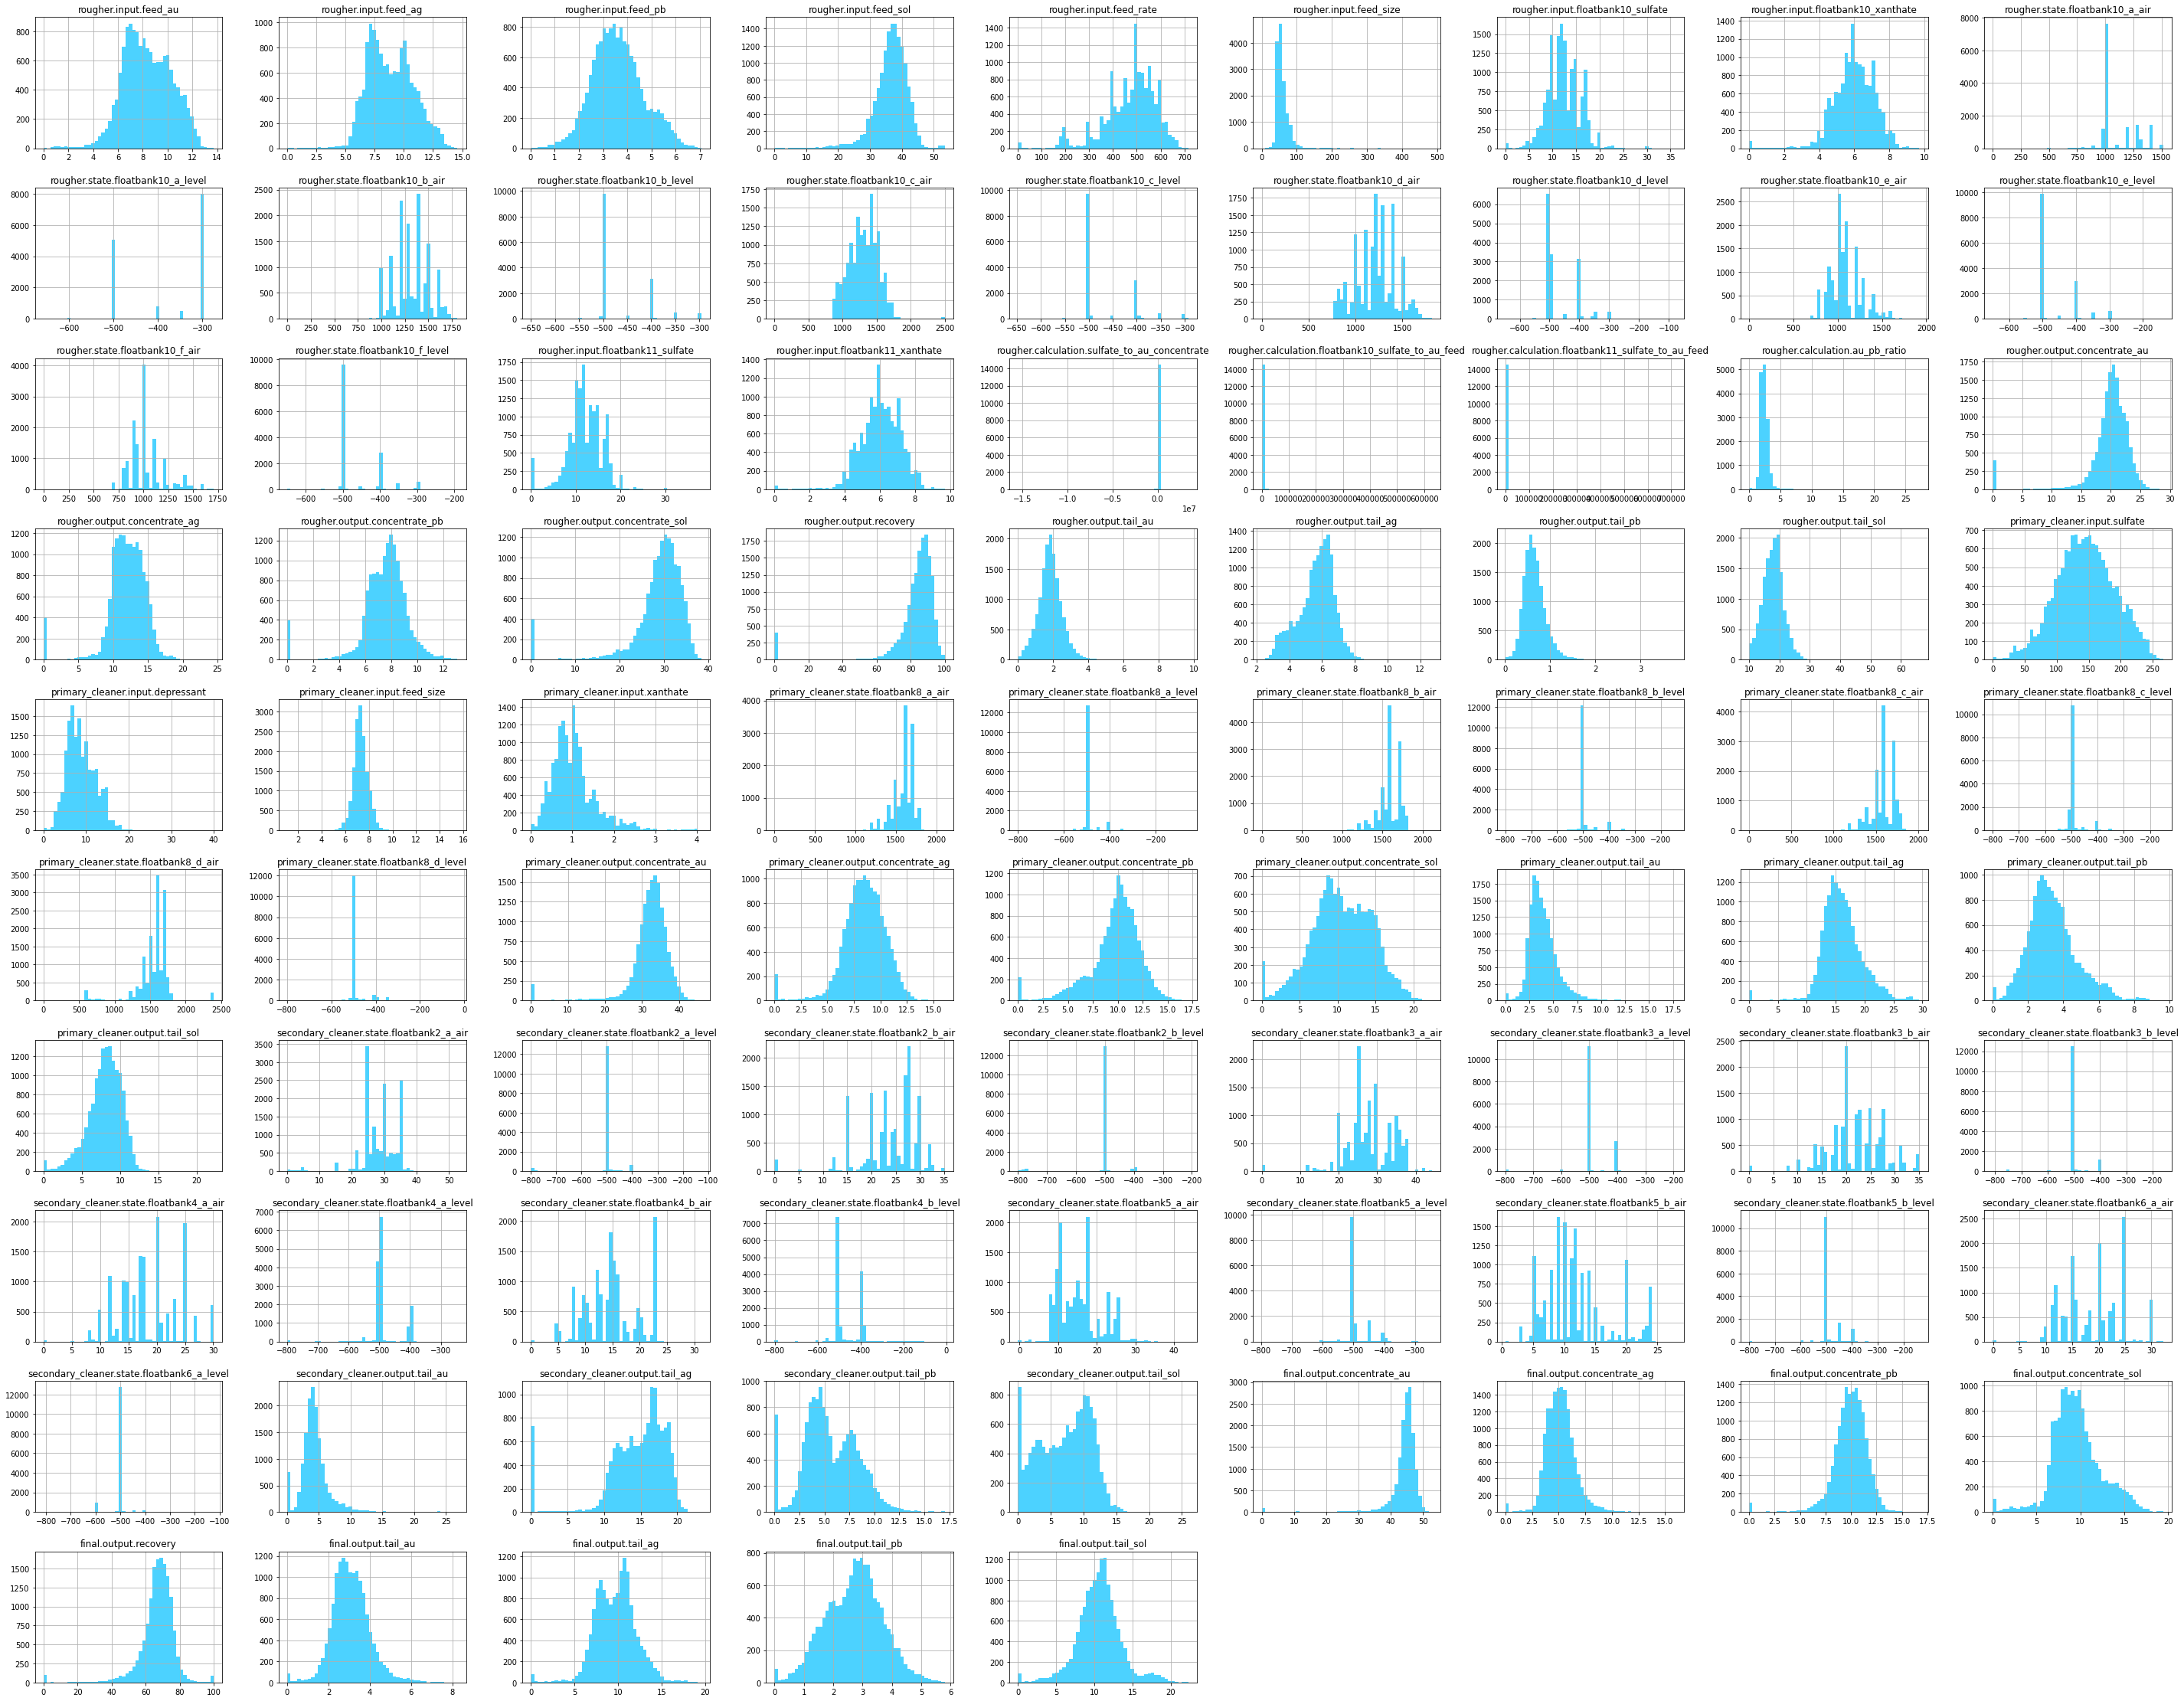

CPU times: user 16.1 s, sys: 636 ms, total: 16.7 s
Wall time: 16.7 s


In [9]:
%%time
data_train.hist(figsize=(50, 40), bins=50, alpha=0.7, color='deepskyblue')
plt.show()

Должно получиться достаточно обьёмное изображение. Для того, чтобы рассмотреть каждую из гистограмм более детально, щёлкните правой кнопкой мыши по изображению, в меню выберите "Открыть в новой вкладке", либо "Сохранить изображение как..."

<a name="target_hist_train"></a>
Отдельно визуализируем распределение целевых признаков `rougher.output.recovery` и `final.output.recovery` в обучающей выборке `gold_industry_train`.

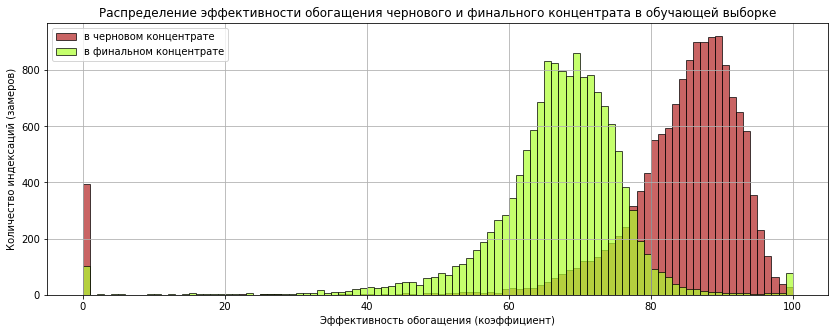

In [10]:
data_train['rougher.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='firebrick', edgecolor = 'black')

data_train['final.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['в черновом концентрате', 
            'в финальном концентрате'])
plt.xlabel('Эффективность обогащения (коэффициент)')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение эффективности обогащения чернового и '
          'финального концентрата в обучающей выборке')
plt.show()

<a name="хитмэп"></a>
Проведём корреляционный анализ для обучающей выборки `gold_industry_train` и посмотрим, как переменные взаимосвязаны между собой. Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона.

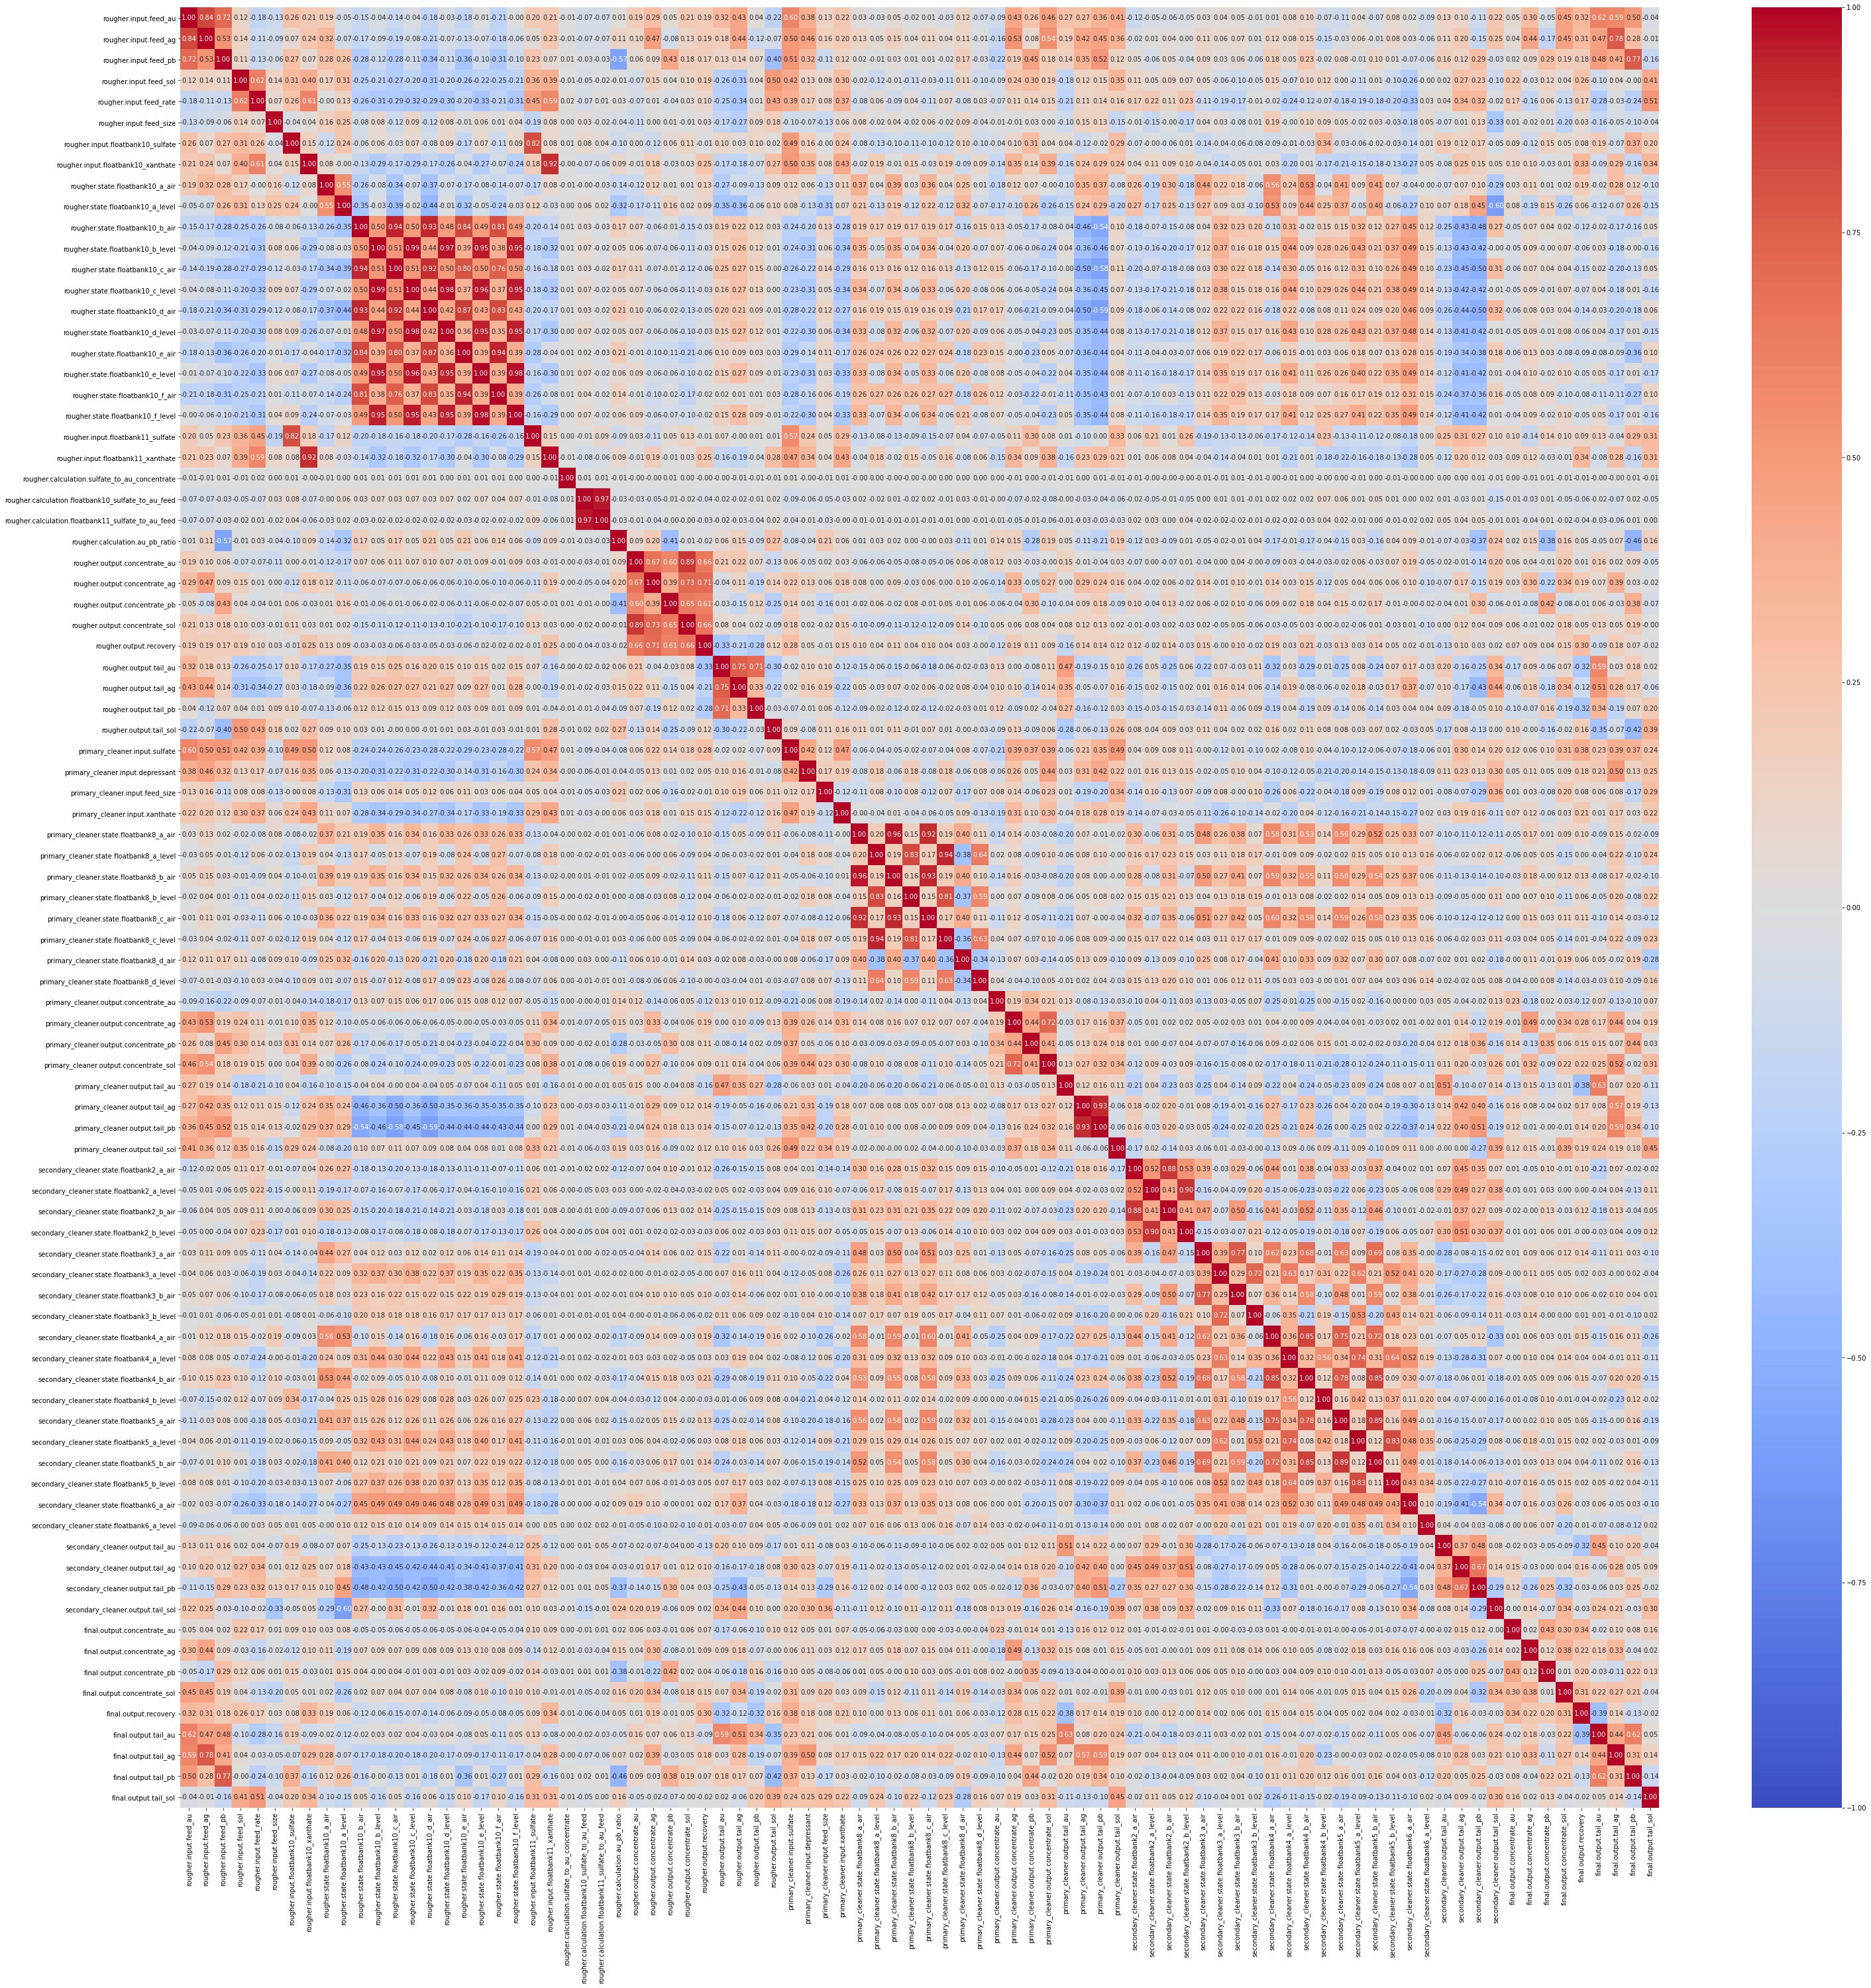

CPU times: user 35.8 s, sys: 6.75 s, total: 42.6 s
Wall time: 42.6 s


In [11]:
%%time

plt.figure(figsize=(50,50))
sns.heatmap(
    data_train.corr(), annot=True, fmt = '.2f', 
    vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

Здесь также, получится обьёмное изображение. Чтобы рассмотреть более детально, щёлкните правой кнопкой мыши по изображению, в меню выберите "Открыть в новой вкладке", либо "Сохранить изображение как..."

#### Тестовая выборка
<a name="312"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Выведем размеры и первые 5 строк данных тестовой выборки `gold_industry_test`. Данные индексируются датой и временем получения информации - признак `date`, поэтому используем признак `date` в качестве индекса.

In [12]:
try:
    data_test = pd.read_csv('/datasets/gold_industry_test.csv', index_col='date', parse_dates=['date'])
except:
    data_test = pd.read_csv('/gold_industry_test.csv', index_col='date', parse_dates=['date'])

In [13]:
data_test.shape

(4860, 52)

In [14]:
data_test.head()

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2017-12-09 14:59:59               4.365491               6.158718   
2017-12-09 15:59:59               4.362781               6.048130   
2017-12-09 16:59:59               5.081681               6.082745   
2017-12-09 17:59:59               5.145949               6.084374   
2017-12-09 18:59:59               5.735249               6.165220   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2017-12-09 14:59:59               3.875727               39.135119   
2017-12-09 15:59:59               3.902537               39.713906   
2017-12-09 16:59:59               4.564078               37.208683   
2017-12-09 17:59:59               4.768124               36.808874   
2017-12-09 18:59:59               4.512346               37.810642   

                     rougher.input.feed_rate  rougher.input.feed_size  \
date                                                                    
2017-12-09 14:59:59               555.820208                94.544358   
2017-12-09 15:59:59               544.731687               123.742430   
2017-12-09 16:59:59               558.155110                82.610855   
2017-12-09 17:59:59               539.713765                77.984784   
2017-12-09 18:59:59               558.713584                86.434874   

                     rougher.input.floatbank10_sulfate  \
date                                                     
2017-12-09 14:59:59                           6.146982   
2017-12-09 15:59:59                           6.210119   
2017-12-09 16:59:59                           7.363824   
2017-12-09 17:59:59                           6.927072   
2017-12-09 18:59:59                           7.823471   

                     rougher.input.floatbank10_xanthate  \
date                                                      
2017-12-09 14:59:59                            9.308612   
2017-12-09 15:59:59                            9.297709   
2017-12-09 16:59:59                            9.003562   
2017-12-09 17:59:59                            8.955597   
2017-12-09 18:59:59                            7.490356   

                     rougher.state.floatbank10_a_air  \
date                                                   
2017-12-09 14:59:59                      1196.238112   
2017-12-09 15:59:59                      1201.904177   
2017-12-09 16:59:59                      1200.826926   
2017-12-09 17:59:59                      1199.292489   
2017-12-09 18:59:59                      1198.005449   

                     rougher.state.floatbank10_a_level  \
date                                                     
2017-12-09 14:59:59                        -299.862743   
2017-12-09 15:59:59                        -299.907308   
2017-12-09 16:59:59                        -300.124116   
2017-12-09 17:59:59                        -299.778385   
2017-12-09 18:59:59                        -300.283401   

                     rougher.state.floatbank10_b_air  \
date                                                   
2017-12-09 14:59:59                      1147.248241   
2017-12-09 15:59:59                      1154.087804   
2017-12-09 16:59:59                      1150.754676   
2017-12-09 17:59:59                      1152.512559   
2017-12-09 18:59:59                      1099.481500   

                     rougher.state.floatbank10_b_level  \
date                                                     
2017-12-09 14:59:59                        -500.363165   
2017-12-09 15:59:59                        -500.036580   
2017-12-09 16:59:59                        -499.986009   
2017-12-09 17:59:59                        -500.338106   
2017-12-09 18:59:59                        -499.702465   

                     rougher.state.floatbank10_c_air  \
date                                                   
2

Проверим явные дубликаты в тестовой выборке `gold_industry_test`.

In [15]:
data_test.duplicated().sum()

0

Выведем общую информацию о тестовой выборке `gold_industry_test`.

In [16]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4832 non-null   float64
 3   rougher.input.feed_sol                      4838 non-null   float64
 4   rougher.input.feed_rate                     4856 non-null   float64
 5   rougher.input.feed_size                     4816 non-null   float64
 6   rougher.input.floatbank10_sulfate           4857 non-null   float64
 7   rougher.input.floatbank10_xanthate          4859 non-null   float64
 8   rougher.state.floatbank10_a_air             4859 non-null   float64
 9   rougher.state.floatbank10_a_level           4859 

Выведем количество пропусков в тестовой выборке `gold_industry_test`.

In [17]:
data_test.isna().sum()

rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0


Выведем числовое описание данных в тестовой выборке, применив метод `.describe()`.

In [18]:
data_test.describe()

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
count            4860.000000            4860.000000            4832.000000   
mean                8.005584               8.547348               3.579662   
std                 1.993590               1.958601               1.029377   
min                 0.010000               0.010000               0.010000   
25%                 6.574363               6.975898               2.903612   
50%                 7.812923               8.179714               3.540772   
75%                 9.556589              10.084339               4.199847   
max                13.417156              14.533698               7.142594   

       rougher.input.feed_sol  rougher.input.feed_rate  \
count             4838.000000              4856.000000   
mean                37.095864               490.285103   
std                  4.926284                94.371623   
min                  0.010000                 0.012786   
25%                 34.510841               434.099695   
50%                 37.499761               502.118742   
75%                 40.461315               555.596563   
max                 53.477742               702.523396   

       rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
count              4816.000000                        4857.000000   
mean                 59.113400                          12.055735   
std                  19.125122                           3.407642   
min                   0.046369                           0.018907   
25%                  47.596984                           9.890429   
50%                  55.509481                          11.997859   
75%                  66.661547                          14.496072   
max                 363.989699                          30.010759   

       rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
count                         4859.000000                      4859.000000   
mean                             6.101308                      1108.635895   
std                              1.042754                       156.493143   
min                              0.015783                       300.792494   
25%                              5.499808                       999.715729   
50%                              6.099805                      1001.414798   
75%                              6.802101                      1202.837565   
max                              9.396928                      1521.980372   

       rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
count                        4859.000000                      4859.000000   
mean                         -368.340127                      1312.346061   
std                            91.155929                       159.001709   
min                          -600.568138                       767.656587   
25%                          -499.731972                      1199.741605   
50%                          -300.181367                      1300.278835   
75%                          -299.961547                      1401.691789   
max                          -281.039299                      1802.528564   

       rougher.state.floatbank10_b_level  rougher.state.floatbank10_c_air  \
count                        4859.000000                      4859.000000   
mean                         -472.506533                      1291.638282   
std                            49.376824                       180.203670   
min                          -649.997496                       831.537936   
25%                          -500.218827                      1152.401989   
50%                          -499.827934                      1299.411789   
75%                          -449.925513                      1401.933884   
max                          -298.836629                      2498.873242   

       rougher.state.floatbank10_c_level  rougher.state.floatbank10_

Распределение переменных в тестовой выборке `gold_industry_test` аналогично [распределению для обучающей выборки `gold_industry_train`](#гистограмма). 

Тепловая карта (хитмэп) коэффициентов корреляции Пирсона для тестовой выборки `gold_industry_test` также аналогична [тепловой карте для обучающей выборки `gold_industry_train`](#хитмэп).

Не будем выводить эти визуализации, чтобы сократить общее время обработки кода.

В тестовой выборке `gold_industry_test` отсутствуют целевые признаки `rougher.output.recovery` и `final.output.recovery`, а также некоторые признаки, которые могут быть в обучающей выборке `gold_industry_train` (см. раздел [**Описание данных**](#Описание-данных)).

Исходный датасет `gold_industry_full` содержит обучающую и тестовую выборки со всеми признаками.

#### Исходные данные
<a name="313"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Выведем размеры и первые 5 строк исходных данных `gold_industry_full`. Данные индексируются датой и временем получения информации - признак `date`, поэтому используем признак `date` в качестве индекса.

In [19]:
try:
    data_full = pd.read_csv('/datasets/gold_industry_full.csv', index_col='date', parse_dates=['date'])
except:
    data_full = pd.read_csv('/gold_industry_full.csv', index_col='date', parse_dates=['date'])

In [20]:
data_full.shape

(19439, 86)

In [21]:
data_full.head()

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2016-01-15 00:00:00               6.486150               6.100378   
2016-01-15 01:00:00               6.478583               6.161113   
2016-01-15 02:00:00               6.362222               6.116455   
2016-01-15 03:00:00               6.118189               6.043309   
2016-01-15 04:00:00               5.663707               6.060915   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2016-01-15 00:00:00               2.284912               36.808594   
2016-01-15 01:00:00               2.266033               35.753385   
2016-01-15 02:00:00               2.159622               35.971630   
2016-01-15 03:00:00               2.037807               36.862241   
2016-01-15 04:00:00               1.786875               34.347666   

                     rougher.input.feed_rate  rougher.input.feed_size  \
date                                                                    
2016-01-15 00:00:00               523.546326                55.486599   
2016-01-15 01:00:00               525.290581                57.278666   
2016-01-15 02:00:00               530.026610                57.510649   
2016-01-15 03:00:00               542.590390                57.792734   
2016-01-15 04:00:00               540.531893                56.047189   

                     rougher.input.floatbank10_sulfate  \
date                                                     
2016-01-15 00:00:00                          11.986616   
2016-01-15 01:00:00                          11.971193   
2016-01-15 02:00:00                          11.920603   
2016-01-15 03:00:00                          11.630094   
2016-01-15 04:00:00                          10.957755   

                     rougher.input.floatbank10_xanthate  \
date                                                      
2016-01-15 00:00:00                            6.007990   
2016-01-15 01:00:00                            6.005766   
2016-01-15 02:00:00                            6.197377   
2016-01-15 03:00:00                            6.203177   
2016-01-15 04:00:00                            6.198826   

                     rougher.state.floatbank10_a_air  \
date                                                   
2016-01-15 00:00:00                       999.706909   
2016-01-15 01:00:00                      1000.286398   
2016-01-15 02:00:00                       999.719565   
2016-01-15 03:00:00                       999.814770   
2016-01-15 04:00:00                       999.678690   

                     rougher.state.floatbank10_a_level  \
date                                                     
2016-01-15 00:00:00                        -404.066986   
2016-01-15 01:00:00                        -400.065196   
2016-01-15 02:00:00                        -400.074028   
2016-01-15 03:00:00                        -400.200179   
2016-01-15 04:00:00                        -399.752729   

                     rougher.state.floatbank10_b_air  \
date                                                   
2016-01-15 00:00:00                      1603.011353   
2016-01-15 01:00:00                      1600.754587   
2016-01-15 02:00:00                      1599.337330   
2016-01-15 03:00:00                      1600.059442   
2016-01-15 04:00:00                      1600.208824   

                     rougher.state.floatbank10_b_level  \
date                                                     
2016-01-15 00:00:00                        -434.715027   
2016-01-15 01:00:00                        -449.953435   
2016-01-15 02:00:00                        -450.008530   
2016-01-15 03:00:00                        -450.619948   
2016-01-15 04:00:00                        -449.599614   

                     rougher.state.floatbank10_c_air  \
date                                                   
2

Проверим явные дубликаты в исходных данных `gold_industry_full`.

In [22]:
data_full.duplicated().sum()

0

<a name="info"></a>
Выведем общую информацию об исходных данных `gold_industry_full`.

In [23]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               19439 non-null  float64
 1   rougher.input.feed_ag                               19439 non-null  float64
 2   rougher.input.feed_pb                               19339 non-null  float64
 3   rougher.input.feed_sol                              19340 non-null  float64
 4   rougher.input.feed_rate                             19428 non-null  float64
 5   rougher.input.feed_size                             19294 non-null  float64
 6   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 7   rougher.input.floatbank10_xanthate                  19431 non-null  float64
 8   rougher.state.floatbank10_a_air          

Выведем количество пропусков в исходных данных `gold_industry_full`.

In [24]:
data_full.isna().sum()

rougher.input.feed_au                                    0
rougher.input.feed_ag                                    0
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
rougher.input.feed_rate                                 11
rougher.input.feed_size                                145
rougher.input.floatbank10_sulfate                       34
rougher.input.floatbank10_xanthate                       8
rougher.state.floatbank10_a_air                          1
rougher.state.floatbank10_a_level                        1
rougher.state.floatbank10_b_air                          1
rougher.state.floatbank10_b_level                        1
rougher.state.floatbank10_c_air                          1
rougher.state.floatbank10_c_level                        1
rougher.state.floatbank10_d_air                          0
rougher.state.floatbank10_d_level                        0
rougher.state.floatbank10_e_air                        4

Выведем числовое описание исходных данных, применив метод `.describe()`.

In [25]:
data_full.describe()

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
count           19439.000000           19439.000000           19339.000000   
mean                8.266097               8.794927               3.598085   
std                 1.955092               1.936847               1.049486   
min                 0.010000               0.010000               0.010000   
25%                 6.854384               7.237967               2.887280   
50%                 8.125839               8.593574               3.534895   
75%                 9.769917              10.213771               4.244161   
max                13.731330              14.596026               7.142594   

       rougher.input.feed_sol  rougher.input.feed_rate  \
count            19340.000000             19428.000000   
mean                36.695114               478.320042   
std                  5.145445               105.373758   
min                  0.010000                 0.002986   
25%                 34.207799               416.525453   
50%                 37.202650               499.416120   
75%                 40.039133               550.172183   
max                 53.477742               717.508837   

       rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
count             19294.000000                       19405.000000   
mean                 58.970310                          12.334373   
std                  21.634478                           3.427317   
min                   0.046369                           0.001083   
25%                  47.435103                          10.000362   
50%                  54.610197                          12.001174   
75%                  65.023044                          14.716595   
max                 484.967466                          36.118275   

       rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
count                        19431.000000                     19438.000000   
mean                             6.021474                      1105.315068   
std                              1.127263                       160.826798   
min                              0.000568                        -0.042069   
25%                              5.398678                       999.661867   
50%                              6.008273                      1001.072890   
75%                              6.798051                      1205.620588   
max                              9.703448                      1521.980372   

       rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
count                       19438.000000                     19438.000000   
mean                         -376.610690                      1320.221139   
std                            93.909667                       176.287095   
min                          -657.949759                        -0.721806   
25%                          -499.835165                      1199.626115   
50%                          -300.263994                      1301.579988   
75%                          -299.981998                      1448.630789   
max                          -273.776101                      1809.194008   

       rougher.state.floatbank10_b_level  rougher.state.floatbank10_c_air  \
count                       19438.000000                     19438.000000   
mean                         -467.247826                      1299.968799   
std                            54.673142                       202.804325   
min                          -650.260008                        -0.056636   
25%                          -500.201130                      1151.076301   
50%                          -499.784045                      1300.211537   
75%                          -400.615589                      1449.464001   
max                          -296.383080                      2499.129174   

       rougher.state.floatbank10_c_level  rougher.state.floatbank10_

Распределение переменных в исходных данных `gold_industry_full` аналогично [распределению для обучающей выборки `gold_industry_train`](#гистограмма), поэтому мы не будем выводить эту визуализацию, чтобы сократить общее время обработки кода.

<a name="target_hist_full"></a>
Отдельно визуализируем распределение целевых признаков `rougher.output.recovery` и `final.output.recovery` в исходных данных `gold_industry_full`.

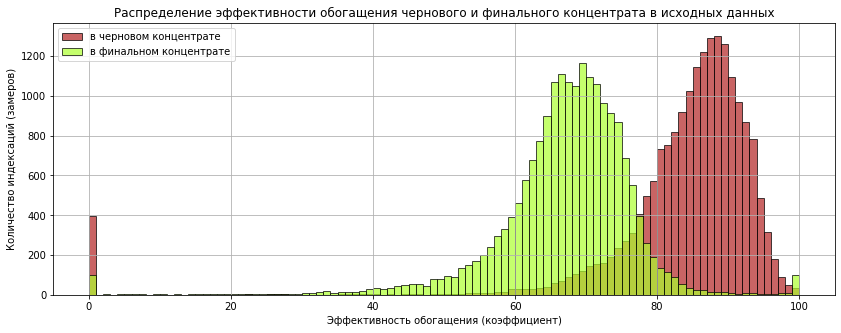

In [26]:
data_full['rougher.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='firebrick', edgecolor = 'black')

data_full['final.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['в черновом концентрате', 
            'в финальном концентрате'])
plt.xlabel('Эффективность обогащения (коэффициент)')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение эффективности обогащения чернового и '
          'финального концентрата в исходных данных')
plt.show()

Тепловая карта (хитмэп) коэффициентов корреляции Пирсона для исходных данных `gold_industry_full` также аналогична [тепловой карте для обучающей выборки `gold_industry_train`](#хитмэп). Поэтому, мы не будем выводить эту визуализацию, чтобы сократить время обработки кода.

#### Дополнение
<a name="314"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Желательно, чтобы признаки датасета с исходными данными (`gold_industry_full`) были расположены в порядке, примерно отражающем последовательность стадий выполнения технологичекского процесса:

- rougher — флотация;
- primary_cleaner — первичная очистка;
- secondary_cleaner — вторичная очистка;
- final — финальные характеристики.

В этом мы убедились, применяя [метод info()](#info) к датасету `data_full` в одном из предыдущих шагов.

#### Вывод по п. 3.1
<a name="315"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**Исследование данных**](#Исследование-данных) изучена общая информация о следующих данных:
1. обучающая выборка `gold_industry_train`;
2. тестовая выборка `gold_industry_test`;
3. исходные данные `gold_industry_full`.


В результате выполнения задач этого подраздела было выявлено следующее:
1. Пропуски в данных занимают незначительное количество. 
2. Все признаки, кроме `date`, имеют вещественный тип `float`. 
3. Явные дубликаты отсутствуют. 
4. Распределение признаков очень разноообразно, при этом все признаки (кроме `date`) - количественные. В частности, распределение целевых признаков имеет отрицательную асимметрию (смещено влево). Сложно сказать, подчиняется ли оно какому-либо стандартному закону.
5. В распределении признаков присутствуют аномальные значения концентраций, равные нулю (пик слева).
6. Корреляционный анализ показал, что в данных присутствует сильная зависимость между некоторыми величинами, связанными с:
    - концентрациями металлов в руде (между серебром (`ag`) и свинцом (`pb`), золотом (`au`) и растворителем/коллоидом (`sol`, aka *solvent*));
    - применением реагентов ксантогенат (`xanthate`) и сульфат (`sulphate`);
    - зависимыми между собой последовательными технологическими процессами обработки воздухом смеси частиц руды с водой (параметры `.state.floatbankX_a_air`, `.state.floatbankX_b_air` и т.д.).
7. Целевые признаки `rougher.output.recovery` (эффективность обогащения чернового концентрата) и `final.output.recovery` (эффективность обогащения финального концентрата) - количественные, а значит для их предсказания решается задача регрессии.

**В проекте решается задача регрессии.**

### Расчёт эффективности обогащения
<a name="32"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проверим, что эффективность обогащения (значение признака) рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдём *MAE* между нашими расчётами и значением признака. Опишем выводы.

Напомним:

1. Эффективность обогащения рассчитывается по формуле:


$$
Recovery = {{C \times (F - T)} \over {F \times (C - T)}} \times 100\%
$$

где:
- $C$ — доля золота в концентрате после флотации/очистки (`rougher.output.concentrate_au`);
- $F$ — доля золота в сырье/концентрате до флотации/очистки (`rougher.input.feed_au`);
- $T$ — доля золота в отвальных хвостах после флотации/очистки (`rougher.output.tail_au`).

2. Среднее абсолютное отклонение ***MAE*** для линейной регрессии в общем виде рассчитывается так:

```
mae = mean_absolute_error(target_valid, predicted_valid)
```

Вычислим эффективность обогащения `recovery` на обучающей выборке `gold_industry_train` для признака `rougher.output.recovery` и запишем её значения в новый признак `rougher_output_recovery_predicted`.

In [27]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']

recovery = ((c * (f - t))/(f * (c - t))) * 100

data_train['rougher_output_recovery_predicted'] = recovery
data_train.head()

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2016-01-15 00:00:00               6.486150               6.100378   
2016-01-15 01:00:00               6.478583               6.161113   
2016-01-15 02:00:00               6.362222               6.116455   
2016-01-15 03:00:00               6.118189               6.043309   
2016-01-15 04:00:00               5.663707               6.060915   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2016-01-15 00:00:00               2.284912               36.808594   
2016-01-15 01:00:00               2.266033               35.753385   
2016-01-15 02:00:00               2.159622               35.971630   
2016-01-15 03:00:00               2.037807               36.862241   
2016-01-15 04:00:00               1.786875               34.347666   

                     rougher.input.feed_rate  rougher.input.feed_size  \
date                                                                    
2016-01-15 00:00:00               523.546326                55.486599   
2016-01-15 01:00:00               525.290581                57.278666   
2016-01-15 02:00:00               530.026610                57.510649   
2016-01-15 03:00:00               542.590390                57.792734   
2016-01-15 04:00:00               540.531893                56.047189   

                     rougher.input.floatbank10_sulfate  \
date                                                     
2016-01-15 00:00:00                          11.986616   
2016-01-15 01:00:00                          11.971193   
2016-01-15 02:00:00                          11.920603   
2016-01-15 03:00:00                          11.630094   
2016-01-15 04:00:00                          10.957755   

                     rougher.input.floatbank10_xanthate  \
date                                                      
2016-01-15 00:00:00                            6.007990   
2016-01-15 01:00:00                            6.005766   
2016-01-15 02:00:00                            6.197377   
2016-01-15 03:00:00                            6.203177   
2016-01-15 04:00:00                            6.198826   

                     rougher.state.floatbank10_a_air  \
date                                                   
2016-01-15 00:00:00                       999.706909   
2016-01-15 01:00:00                      1000.286398   
2016-01-15 02:00:00                       999.719565   
2016-01-15 03:00:00                       999.814770   
2016-01-15 04:00:00                       999.678690   

                     rougher.state.floatbank10_a_level  \
date                                                     
2016-01-15 00:00:00                        -404.066986   
2016-01-15 01:00:00                        -400.065196   
2016-01-15 02:00:00                        -400.074028   
2016-01-15 03:00:00                        -400.200179   
2016-01-15 04:00:00                        -399.752729   

                     rougher.state.floatbank10_b_air  \
date                                                   
2016-01-15 00:00:00                      1603.011353   
2016-01-15 01:00:00                      1600.754587   
2016-01-15 02:00:00                      1599.337330   
2016-01-15 03:00:00                      1600.059442   
2016-01-15 04:00:00                      1600.208824   

                     rougher.state.floatbank10_b_level  \
date                                                     
2016-01-15 00:00:00                        -434.715027   
2016-01-15 01:00:00                        -449.953435   
2016-01-15 02:00:00                        -450.008530   
2016-01-15 03:00:00                        -450.619948   
2016-01-15 04:00:00                        -449.599614   

                     rougher.state.floatbank10_c_air  \
date                                                   
2

<a name="пропуски"></a>
Перед расчётом *MAE* необходимо заполнить пропуски в данных. Т.к. наши данные - это последовательные этапы технологического процесса (замеры), то пропуски можно заполнить следующим/предыдущим значением (см. раздел [**Описание данных**](#Описание-данных) и пункт [3.1.4  Дополнение](#Дополнение)). Воспользуемся методом `.ffill()` вдоль строк.

In [28]:
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)

Найдём *MAE* между нашими расчётами и значением признака.

In [29]:
mae = mean_absolute_error(
    data_train['rougher.output.recovery'], 
    data_train['rougher_output_recovery_predicted']
)
display(mae)

9.83758577644259e-15

In [30]:
data_train[['rougher.output.recovery', 
            'rougher_output_recovery_predicted']].head()

rougher.output.recovery  \
date                                           
2016-01-15 00:00:00                87.107763   
2016-01-15 01:00:00                86.843261   
2016-01-15 02:00:00                86.842308   
2016-01-15 03:00:00                87.226430   
2016-01-15 04:00:00                86.688794   

                     rougher_output_recovery_predicted  
date                                                    
2016-01-15 00:00:00                          87.107763  
2016-01-15 01:00:00                          86.843261  
2016-01-15 02:00:00                          86.842308  
2016-01-15 03:00:00                          87.226430  
2016-01-15 04:00:00                          86.688794

Среднее абсолютное отклонение ***MAE*** между нашими расчётами `rougher_output_recovery_predicted` и значением признака `rougher.output.recovery` составляет $9.8*10^{-15}$. Можно сделать вывод, что эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке
<a name="33"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

Выведем признаки, которые отсутствуют в тестовой выборке `gold_industry_test`.

In [31]:
data_train_columns_remains = set(data_train.columns) - set(data_test.columns)

data_train_remains = data_train[list(data_train_columns_remains)]
display(list(data_train_remains))

['final.output.concentrate_au',
 'rougher.output.recovery',
 'primary_cleaner.output.tail_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher_output_recovery_predicted',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_ag',
 'final.output.tail_au',
 'final.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.concentrate_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.output.tail_sol',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'final.output.tail_pb',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'primary_cleaner.output.tail_sol',
 'primary_clean

Наименование признаков имеет такой вид:

`[этап].[тип_параметра].[название_параметра]`.

Признаки, недоступные в тестовой выборке, имеют следующие типы и параметры (они также указаны в пункте [3.1.4  Дополнение](#Дополнение)):

- `output.concentrate` - концентрация металлов (золота `au`, серебра `ag`, свинца `pb`) и растворителя/коллоида (`sol`, *solvent aka*) в продукте (`output`) на различных этапах очистки;
- `output.tail` - отвальные хвосты (`tail`) продукта (`output`) на различных этапах очистки;
- `calculation` — расчётные характеристики:
  - `rougher.calculation.au_pb_ratio` - расчётные характеристики соотношения золота (`au`) и свинца (`pb`) в исходном сырье (`rougher`);
  - `rougher.calculation.floatbank10_sulfate_to_au_feed` и `rougher.calculation.floatbank11_sulfate_to_au_feed` - расчётные характеристики подачи (`feed`) сульфата (`sulfate`) и золота (`au`) в исходном сырье (`rougher`) во флотационной установке (`floatbank`) (10-й и 11-й этапы);
  - `rougher.calculation.sulfate_to_au_concentrate` - расчётные характеристики концентраций (`concentrate`) сульфата (`sulfate`) и золота (`au`) в исходном сырье (`rougher`).

**Целевые признаки:**

- `rougher.output.recovery` - эффективность обогащения чернового концентрата;
- `final.output.recovery` - эффективность обогащения финального концентрата.

Некоторые параметры в тестовой выборке замеряются и/или рассчитываются значительно позднее. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

### Предобработка данных
<a name="34"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**расчёта эффективности обогащения**](#Расчёт-эффективности-обогащения) уже была проведена [обработка пропусков](#пропуски) в данных. Дополним предобработку данных.

В подразделе [**исследования данных**](#Исследование-данных) в распределении признаков были выявлены аномальные значения концентраций, равные нулю (пик слева), как в [обучающей](#target_hist_train) выборке, так и в  выборке [исходной](#target_hist_full). Удалим их в обучающей выборке, так как удаление выбросов благоприятно сказится на дальнейшем анализе, и обучении моделей.

In [32]:
data_train = data_train[data_train['rougher.output.recovery'] > 0]
data_train = data_train[data_train['final.output.recovery'] > 0]

Для проверки снова визуализируем распределения целевых признаков.

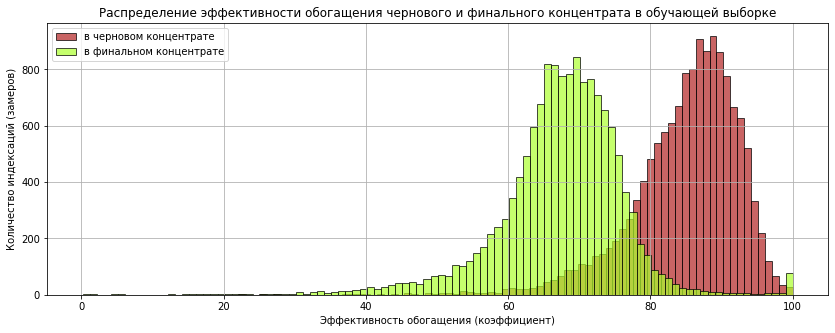

In [34]:
data_train['rougher.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='firebrick', edgecolor = 'black')

data_train['final.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['в черновом концентрате', 
            'в финальном концентрате'])
plt.xlabel('Эффективность обогащения (коэффициент)')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение эффективности обогащения чернового и '
          'финального концентрата в обучающей выборке')
plt.show()

Видно, что аномалии успешно удалены.

В дальнейшем для проверки работы модели нам понадобятся целевые признаки `rougher.output.recovery` и `final.output.recovery` для тестовой выборки `gold_industry_test`.

Выделим целевые признаки `rougher.output.recovery` и `final.output.recovery` из исходных данных `gold_industry_full` по индексам тестовой выборки `gold_industry_test` и введём две переменные:
- `features_test` - признаки в тестовой выборке `gold_industry_test`;
- `target_test` - переменная с целевыми признаками `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в тестовой выборке `gold_industry_test`, соотвествтенно.

Напоминаем, что в качестве индекса датафреймов мы используем признак `date`.

In [36]:
# признаки
features = data_test.columns
# целевые признаки
targets = ['rougher.output.recovery', 'final.output.recovery']

features_test = data_test[features].reset_index(drop=True)
target_test = data_full[targets].loc[data_test.index].reset_index(drop=True)

Выведем признаки в тестовой выборке `gold_industry_test`:

In [37]:
features_test.head()

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
0               4.365491               6.158718               3.875727   
1               4.362781               6.048130               3.902537   
2               5.081681               6.082745               4.564078   
3               5.145949               6.084374               4.768124   
4               5.735249               6.165220               4.512346   

   rougher.input.feed_sol  rougher.input.feed_rate  rougher.input.feed_size  \
0               39.135119               555.820208                94.544358   
1               39.713906               544.731687               123.742430   
2               37.208683               558.155110                82.610855   
3               36.808874               539.713765                77.984784   
4               37.810642               558.713584                86.434874   

   rougher.input.floatbank10_sulfate  rougher.input.floatbank10_xanthate  \
0                           6.146982                            9.308612   
1                           6.210119                            9.297709   
2                           7.363824                            9.003562   
3                           6.927072                            8.955597   
4                           7.823471                            7.490356   

   rougher.state.floatbank10_a_air  rougher.state.floatbank10_a_level  \
0                      1196.238112                        -299.862743   
1                      1201.904177                        -299.907308   
2                      1200.826926                        -300.124116   
3                      1199.292489                        -299.778385   
4                      1198.005449                        -300.283401   

   rougher.state.floatbank10_b_air  rougher.state.floatbank10_b_level  \
0                      1147.248241                        -500.363165   
1                      1154.087804                        -500.036580   
2                      1150.754676                        -499.986009   
3                      1152.512559                        -500.338106   
4                      1099.481500                        -499.702465   

   rougher.state.floatbank10_c_air  rougher.state.floatbank10_c_level  \
0                      1047.279065                        -500.354091   
1                      1054.009756                        -500.237335   
2                      1049.182824                        -500.014696   
3                      1052.601592                        -499.695075   
4                       999.539264                        -499.306051   

   rougher.state.floatbank10_d_air  rougher.state.floatbank10_d_level  \
0                       948.756608                        -498.439416   
1                       944.138793                        -496.866953   
2                       948.085464                        -499.997003   
3                       955.171539                        -500.294989   
4                       889.445596                        -498.118617   

   rougher.state.floatbank10_e_air  rougher.state.floatbank10_e_level  \
0                       849.441918                        -499.255503   
1                       851.589767                        -499.040466   
2                       850.170086                        -500.270334   
3                       851.957342                        -499.779541   
4                       800.533525                        -499.765068   

   rougher.state.floatbank10_f_air  rougher.state.floatbank10_f_level  \
0                       850.112246                        -499.407112   
1                       851.345606                        -499.122561   
2                       849.557905                        -500.198702   
3                       850.765662                        -501.030559   
4                       800.510356                        -497.289

Выведем по отдельности целевые признаки `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в тестовой выборке `gold_industry_test`:

In [38]:
display(target_test.head())
display(target_test.iloc[:, 0].head())
display(target_test.iloc[:, 1].head())

rougher.output.recovery  final.output.recovery
0                89.514960              70.281454
1                89.858126              65.523246
2                91.816623              74.817644
3                88.478959              63.082720
4                89.230316              74.463380

0    89.514960
1    89.858126
2    91.816623
3    88.478959
4    89.230316
Name: rougher.output.recovery, dtype: float64

0    70.281454
1    65.523246
2    74.817644
3    63.082720
4    74.463380
Name: final.output.recovery, dtype: float64

### Вывод
<a name="35"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Подготовка данных**](#Подготовка-данных) были выполнены следующие задачи:
1. Изучена общая информация о следующих данных:
    - обучающая выборка `gold_industry_train`;
    - тестовая выборка `gold_industry_test`;
    - исходные данные `gold_industry_full`.
2. Выполнен расчёт эффективности обогащения.
3. Выполнен анализ признаков, недоступных в тестовой выборке.
4. Выполнена предобработка данных.


В результате выполнения задач этого раздела было выявлено следующее:
1. Мы убедились в том, что эффективность обогащения (значение признака) рассчитана правильно. Вычислили её на обучающей выборке для признака `rougher.output.recovery`. Нашли *MAE* между нашими расчётами и значением признака.
Среднее абсолютное отклонение ***MAE*** между нашими расчётами `rougher_output_recovery_predicted` и значением признака `rougher.output.recovery` составило $9.8*10^{-15}$. Можно сделать вывод, что эффективность обогащения рассчитана правильно.
2. Проанализировали признаки, недоступные в тестовой выборке. Некоторые параметры в тестовой выборке замеряются и/или рассчитываются значительно позднее. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

**В проекте решается задача регрессии.**

Таким образом, данные подготовлены для обучения моделей.

## Анализ данных
<a name="4"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### Распределение концентрации металлов
<a name="41"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Посмотрим, как меняется концентрация металлов (*Au*, *Ag*, *Pb*) на различных этапах очистки.

Концентрация металлов на различных этапах очистки:
1. `rougher.input.feed_` — в сырье;
2. `rougher.output.concentrate_` — в черновом концентрате;
3. `primary_cleaner.output.concentrate_` - в концентрате после первичной очистки;
4. `final.output.concentrate_` — в финальном концентрате.

In [39]:
# создадим список с концентрацией металлов в сырье
rougher_input_feed = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]

In [40]:
# создадим список с концентрацией металлов в черновом концентрате
rougher_output_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

In [41]:
# создадим список с концентрацией металлов в концентрате 
# после первичной очистки
primary_cleaner_output_concentrate = [
    'primary_cleaner.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol',
]

In [42]:
# создадим список с концентрацией металлов в финальном концентрате
final_output_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]

Выведем данные по концентрациям металлов (*Au*, *Ag*, *Pb*) в сырье, в черновом концентрате, после первичной очистки и финальном концентратах в обучающей выборке `gold_industry_train`:

In [43]:
data_train_concentrate_metal = data_train.loc[
            :, rougher_input_feed + rougher_output_concentrate + \
    primary_cleaner_output_concentrate + final_output_concentrate]
data_train_concentrate_metal.head()

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2016-01-15 00:00:00               6.486150               6.100378   
2016-01-15 01:00:00               6.478583               6.161113   
2016-01-15 02:00:00               6.362222               6.116455   
2016-01-15 03:00:00               6.118189               6.043309   
2016-01-15 04:00:00               5.663707               6.060915   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2016-01-15 00:00:00               2.284912               36.808594   
2016-01-15 01:00:00               2.266033               35.753385   
2016-01-15 02:00:00               2.159622               35.971630   
2016-01-15 03:00:00               2.037807               36.862241   
2016-01-15 04:00:00               1.786875               34.347666   

                     rougher.output.concentrate_au  \
date                                                 
2016-01-15 00:00:00                      19.793808   
2016-01-15 01:00:00                      20.050975   
2016-01-15 02:00:00                      19.737170   
2016-01-15 03:00:00                      19.320810   
2016-01-15 04:00:00                      19.216101   

                     rougher.output.concentrate_ag  \
date                                                 
2016-01-15 00:00:00                      11.500771   
2016-01-15 01:00:00                      11.615865   
2016-01-15 02:00:00                      11.695753   
2016-01-15 03:00:00                      11.915047   
2016-01-15 04:00:00                      12.411054   

                     rougher.output.concentrate_pb  \
date                                                 
2016-01-15 00:00:00                       7.101074   
2016-01-15 01:00:00                       7.278807   
2016-01-15 02:00:00                       7.216833   
2016-01-15 03:00:00                       7.175616   
2016-01-15 04:00:00                       7.240205   

                     rougher.output.concentrate_sol  \
date                                                  
2016-01-15 00:00:00                       28.029297   
2016-01-15 01:00:00                       28.067063   
2016-01-15 02:00:00                       27.454037   
2016-01-15 03:00:00                       27.341277   
2016-01-15 04:00:00                       27.041023   

                     primary_cleaner.output.concentrate_au  \
date                                                         
2016-01-15 00:00:00                              34.174427   
2016-01-15 01:00:00                              34.118526   
2016-01-15 02:00:00                              33.969464   
2016-01-15 03:00:00                              28.260743   
2016-01-15 04:00:00                              33.044932   

                     primary_cleaner.output.concentrate_ag  \
date                                                         
2016-01-15 00:00:00                               8.547551   
2016-01-15 01:00:00                               8.558743   
2016-01-15 02:00:00                               8.603505   
2016-01-15 03:00:00                               7.221879   
2016-01-15 04:00:00                               9.089428   

                     primary_cleaner.output.concentrate_pb  \
date                                                         
2016-01-15 00:00:00                              10.389648   
2016-01-15 01:00:00                              10.497069   
2016-01-15 02:00:00                              10.354494   
2016-01-15 03:00:00                               8.496563   
2016-01-15 04:00:00                               9.986786   

                     primary_cleaner.output.concentrate_sol  \
date                                                          
2016-01-15 00:00:00                               19.529297   
2016-01-15 01:00:00          

<a name="concentrate_metal_table"></a>
Для удобства работы, создадим таблицу `concentrate_metal_table` со средними значениями изменений концентрации металлов (`au`, `ag`, `pb`) на различных этапах очистки.

In [44]:
concentrate_metal_table = pd.DataFrame(
    [['в сырье', 
      data_train_concentrate_metal['rougher.input.feed_au'].mean(),
      data_train_concentrate_metal['rougher.input.feed_ag'].mean(), 
      data_train_concentrate_metal['rougher.input.feed_pb'].mean()],
     ['в черновом концентрате', 
      data_train_concentrate_metal['rougher.output.concentrate_au'].mean(),
      data_train_concentrate_metal['rougher.output.concentrate_ag'].mean(), 
      data_train_concentrate_metal['rougher.output.concentrate_pb'].mean()],
     ['в концентрате после первичной очистки', 
      data_train_concentrate_metal['primary_cleaner.output.concentrate_au'].mean(),
      data_train_concentrate_metal['primary_cleaner.output.concentrate_ag'].mean(), 
      data_train_concentrate_metal['primary_cleaner.output.concentrate_pb'].mean()],
     ['в финальном концентрате', 
      data_train_concentrate_metal['final.output.concentrate_au'].mean(), 
      data_train_concentrate_metal['final.output.concentrate_ag'].mean(), 
      data_train_concentrate_metal['final.output.concentrate_pb'].mean()]],
columns=['концентрация металла', 'Au', 'Ag', 'Pb'])

print('Средние значения концентрации металлов (Au, Ag, Pb) \
на различных этапах очистки')
concentrate_metal_table

Средние значения концентрации металлов (Au, Ag, Pb) на различных этапах очистки


концентрация металла         Au         Ag        Pb
0                                в сырье   8.345258   8.871644  3.587659
1                 в черновом концентрате  20.261377  12.277658  7.706314
2  в концентрате после первичной очистки  31.979076   8.492351  9.722995
3                в финальном концентрате  44.250186   5.235379  9.996132

Построим гистограммы для распределения концентраций всех металлов на различных этапах очистки: в сырье, черновом, после первой очистки и финальном концентратах в обучающей выборке `gold_industry_train`.

Максимальные значения концентраций металлов в сырье, в черновом концентрате, после первичной очистки и в финальном концентрате:

rougher.input.feed_au: 13
rougher.output.concentrate_au: 28
primary_cleaner.output.concentrate_au: 45
final.output.concentrate_au: 52
rougher.input.feed_ag: 14
rougher.output.concentrate_ag: 24
primary_cleaner.output.concentrate_ag: 16
final.output.concentrate_ag: 16
rougher.input.feed_pb: 7
rougher.output.concentrate_pb: 13
primary_cleaner.output.concentrate_pb: 17
final.output.concentrate_pb: 16


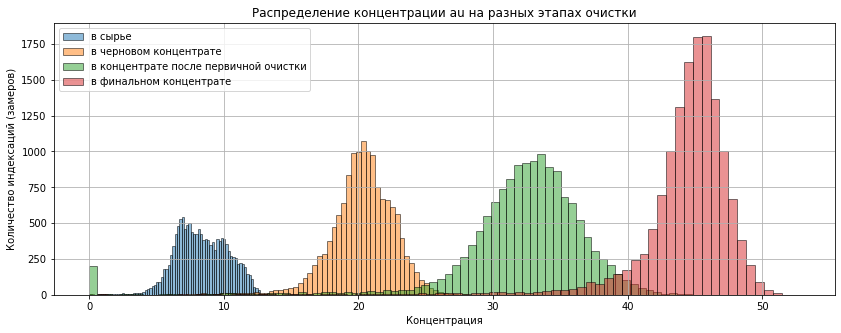

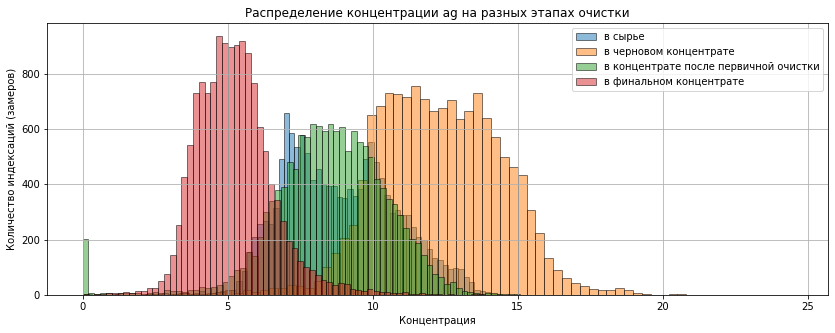

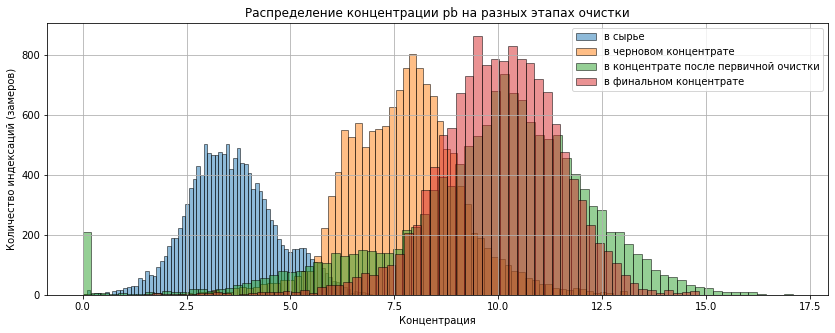

In [45]:
metals = ['au', 'ag', 'pb']
stages = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_',
]

print('\033[1m' + 'Максимальные значения концентраций металлов в сырье, '
      'в черновом концентрате, после первичной очистки и в '
      'финальном концентрате:' + '\033[0m')
print()
    
for metal in metals:
    max_concentration = 0
    plt.figure(figsize=(14, 5))
    plt.grid(True)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество индексаций (замеров)')
    plt.title(f'Распределение концентрации {metal} на разных этапах очистки')
    for stage in stages:
        concentration = data_train[f'{stage}{metal}']
        plt.hist(concentration, bins=80, alpha=0.5, edgecolor = 'black')
        plt.legend(['в сырье', 'в черновом концентрате', 
                    'в концентрате после первичной очистки', 
                    'в финальном концентрате'])
        max_concentraition = max(max_concentration, int(concentration.max()))
        print(f'{stage}{metal}:', max_concentraition)

При этом в распределениях присутствуют аномальные значения концентраций, равные нулю (пик слева). Удалим их, так как удаление выбросов улучшит работу модели.

In [46]:
data_train.shape

(14089, 87)

Используем *list comprehension*, включение (aka представление) списков.

In [47]:
columns_to_change = [column for column in data_train.columns if 'concentrate' in column]

for col in columns_to_change:
    data_train = data_train[data_train[col] > 0]
data_train.shape

(13969, 87)

Проверим распределения ещё раз.

Максимальные значения концентраций металлов в сырье, в черновом концентрате, после первичной очистки и в финальном концентрате:

rougher.input.feed_au: 13
rougher.output.concentrate_au: 28
primary_cleaner.output.concentrate_au: 45
final.output.concentrate_au: 52
rougher.input.feed_ag: 14
rougher.output.concentrate_ag: 24
primary_cleaner.output.concentrate_ag: 16
final.output.concentrate_ag: 16
rougher.input.feed_pb: 7
rougher.output.concentrate_pb: 13
primary_cleaner.output.concentrate_pb: 17
final.output.concentrate_pb: 16


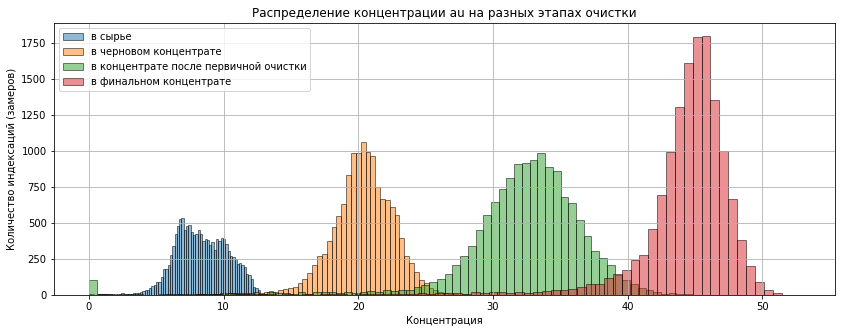

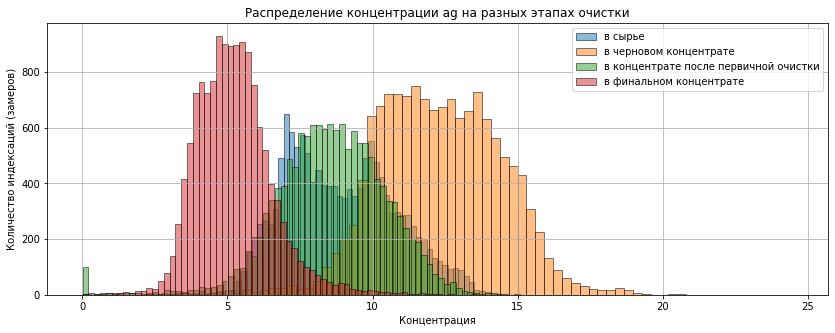

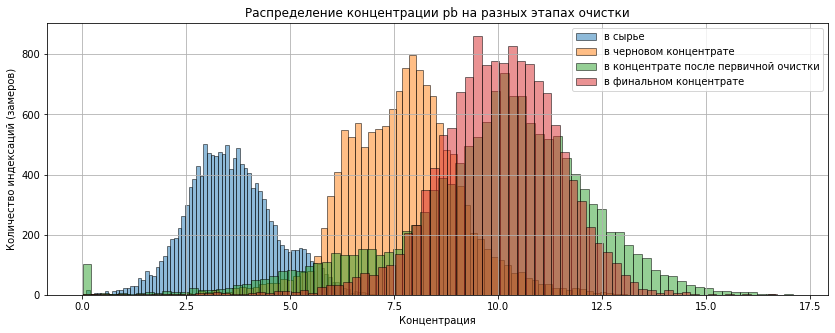

In [48]:
metals = ['au', 'ag', 'pb']
stages = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_',
]

print('\033[1m' + 'Максимальные значения концентраций металлов в сырье, '
      'в черновом концентрате, после первичной очистки и в '
      'финальном концентрате:' + '\033[0m')
print()
    
for metal in metals:
    max_concentration = 0
    plt.figure(figsize=(14, 5))
    plt.grid(True)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество индексаций (замеров)')
    plt.title(f'Распределение концентрации {metal} на разных этапах очистки')
    for stage in stages:
        concentration = data_train[f'{stage}{metal}']
        plt.hist(concentration, bins=80, alpha=0.5, edgecolor = 'black')
        plt.legend(['в сырье', 'в черновом концентрате', 
                    'в концентрате после первичной очистки', 
                    'в финальном концентрате'])
        max_concentraition = max(max_concentration, int(concentration.max()))
        print(f'{stage}{metal}:', max_concentraition)

Связанный с гистограммой тип графиков — график плотности, который формируется путем вычисления оценки непрерывного распределения вероятности, которое могло бы генерироваться наблюдаемыми данными. Обычная процедура заключается в аппроксимации этого распределение как смеси "ядер", то есть более простых распределений, таких как нормальное распределение. Таким образом, графики под графиками плотности также можно понимать графики оценки плотности ядра (*KDE*, *Kernel Density Estimate*).

**График оценки плотности ядра (англ. Kernel Density Estimation, KDE)** (*kdeplot*) позволяет нам оценивать функцию плотности вероятности непрерывной или непараметрической кривой из нашего набора данных в одном или нескольких измерениях. Это означает, что мы можем построить единый график для нескольких выборок, что помогает в более эффективной визуализации данных.

Плотность вероятности — один из способов задания распределения случайной величины. Во многих практических приложениях понятия "плотность вероятности" и "плотность (распределения) случайной величины" или "функция распределения вероятностей" фактически синонимизируются и под ними подразумевается вещественная функция, характеризующая сравнительную вероятность реализации тех или иных значений случайной переменной (переменных).

*Плотность вероятности*, или "*плотность (распределения) случайной величины*", - один из способов задания распределения случайной величины. Это - вещественная функция, характеризующая сравнительную вероятность реализации тех или иных значений случайной переменной (переменных). В нашем случае - значений концентрации в определённых признаках датасета (признаках).

Т.к. мы имеем дело с непрерывной величиной, для анализа её распределения мы можем построить график распределения плотности *kde* (`sns.kdeplot`) вместо обычной гистограммы.

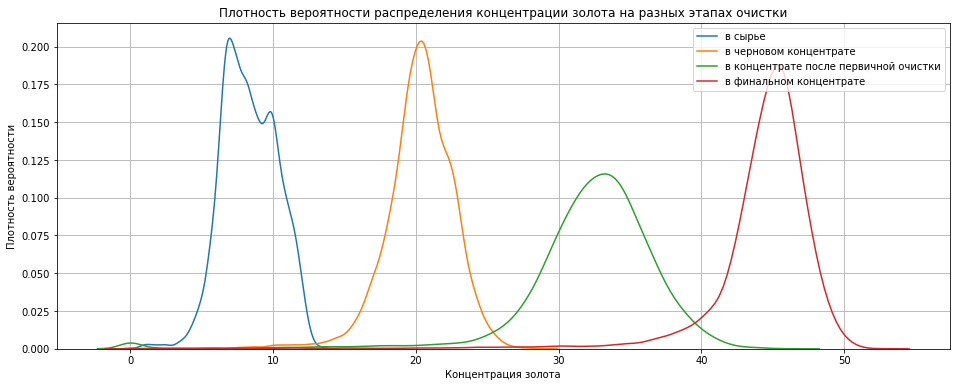

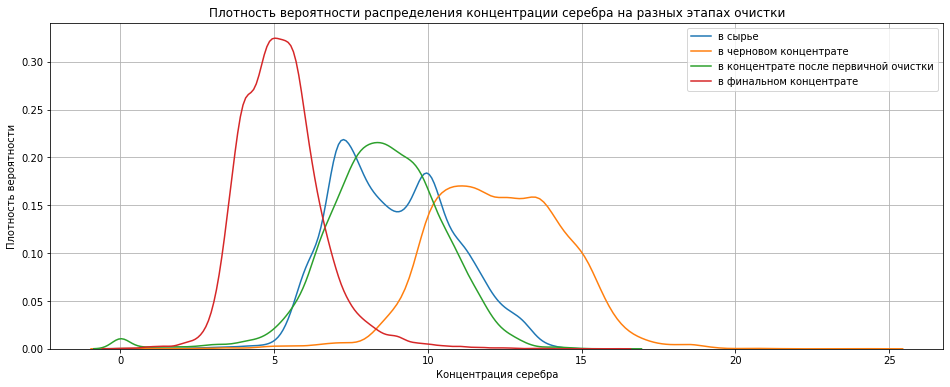

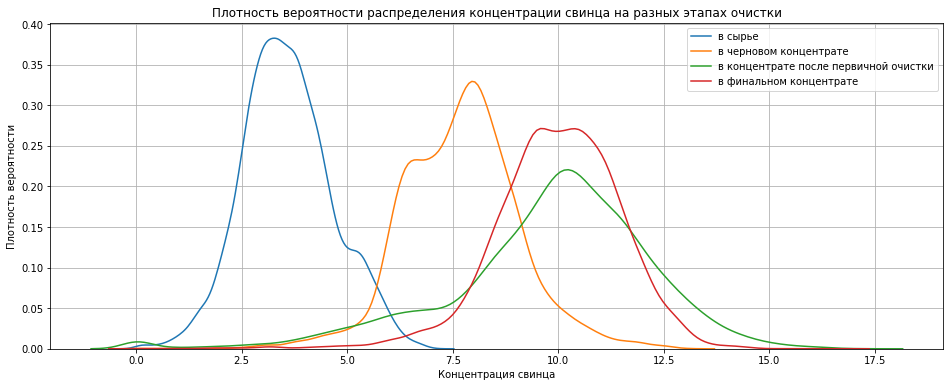

In [49]:
def concentrate_metalls_stages():

    for i,j in zip(('au','ag','pb'), ('золота', 'серебра', 'свинца')):    

        plt.figure(figsize=(16,6))
        
        sns.kdeplot(x=data_train['rougher.input.feed_' + i], 
                    label='в сырье')
        sns.kdeplot(x=data_train['rougher.output.concentrate_' + i], 
                    label='в черновом концентрате')
        sns.kdeplot(x=data_train['primary_cleaner.output.concentrate_' + i], 
                    label='в концентрате после первичной очистки')
        sns.kdeplot(x=data_train['final.output.concentrate_' + i], 
                    label='в финальном концентрате')

        plt.legend()
        plt.grid()
        plt.title(f'Плотность вероятности распределения концентрации {j} '
                  'на разных этапах очистки')
        plt.xlabel(f'Концентрация {j}')
        plt.ylabel('Плотность вероятности')
        plt.show()
        
concentrate_metalls_stages()

Таблица средних значений изменений концентрации металлов [`concentrate_metal_table`](#concentrate_metal_table), а также визуализация распределения концентрации всех металлов на различных этапах очистки наглядно показывают, что средняя концентрация золота (`au`) и свинца (`pb`) возрастает после прохождения каждого этапа. Причём средняя концентрация золота в финале увеличивается более, чем в 5 раз. При этом, средняя концентрация серебра (`ag`), сначала повышается, а потом, наоборот, снижается и становится меньше исходной.

Кроме того, аномальный пик слева исчез - значит, наши данные оптимизированны.

### Распределение размеров гранул сырья
<a name="42"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Теперь сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Напомним, что параметр `feed size` — размер гранул сырья:
1. `rougher.input.feed_size` - размер гранул исходного сырья
2. `primary_cleaner.input.feed_size` - размер гранул при первичной очистке

Построим диаграммы размаха ("ящики с усами") по распределению размеров гранул сырья на обучающей и тестовой выборках.

Поясним особенности этой диаграммы:

- "Ящик" ограничен первым и третьим квартилями (нижняя и верхняя стороны прямоугольника - границы ящика). Внутри ящика зелёной линией обозначена медиана (второй квартиль).
- "Усы" простираются вниз и вверх от границ ящика (чёрные линии ниже и выше границ ящика) на расстояние, равное 1,5 межквартильного размаха (сокращённо *IQR*, от англ. *interquartile range*, "межквартильный размах"). В размах "усов" попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если верхний "ус" длиннее максимума, то он заканчивается максимумом. То же — для минимума и нижнего "уса".

#### Гранулы исходного сырья
<a name="421"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим диаграмму размаха ("ящик с усами"), по распределению размеров гранул исходного сырья `rougher.input.feed_size` на обучающей выборке при помощи метода `.boxplot()`:

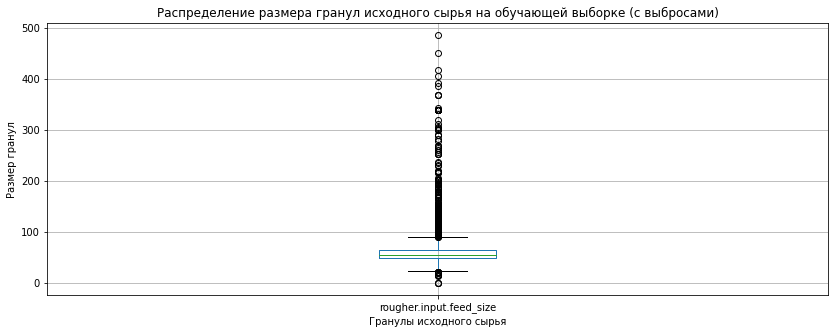

In [50]:
data_train.boxplot(column='rougher.input.feed_size', figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул исходного сырья '
    'на обучающей выборке (с выбросами)')
plt.show()

Построим диаграмму размаха ("ящик с усами"), по распределению размеров гранул исходного сырья `rougher.input.feed_size` на тестовой выборке при помощи метода `.boxplot`:

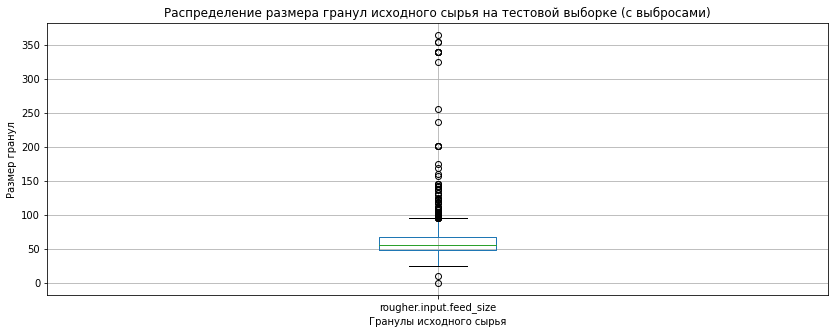

In [51]:
data_test.boxplot(column='rougher.input.feed_size', figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул исходного сырья '
    'на тестовой выборке (с выбросами)')
plt.show()

Видим, что в наличии выбросы, из-за них сложно рассмотреть распределение внутри ящиков, поэтому сделаем второй график без выбросов, указав параметр `showfliers=False`.

Построим диаграмму размаха ("ящик с усами"), по распределению размеров гранул исходного сырья `rougher.input.feed_size` без выбросов на обучающей выборке:

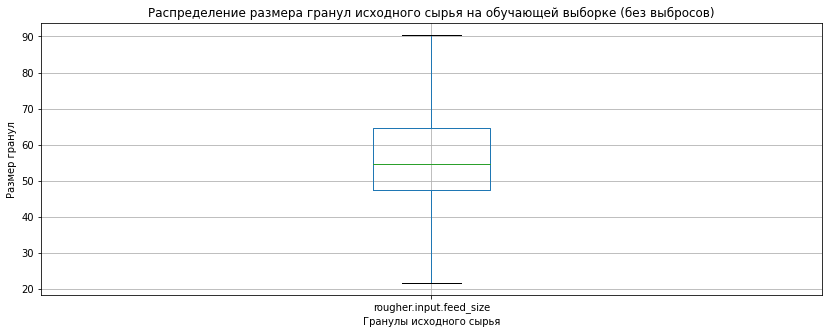

In [52]:
data_train.boxplot(column='rougher.input.feed_size', 
                   showfliers=False, figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул исходного сырья '
    'на обучающей выборке (без выбросов)')
plt.show()

Построим диаграмму размаха ("ящик с усами"), по распределению размеров гранул исходного сырья `rougher.input.feed_size` без выбросов на тестовой выборке:

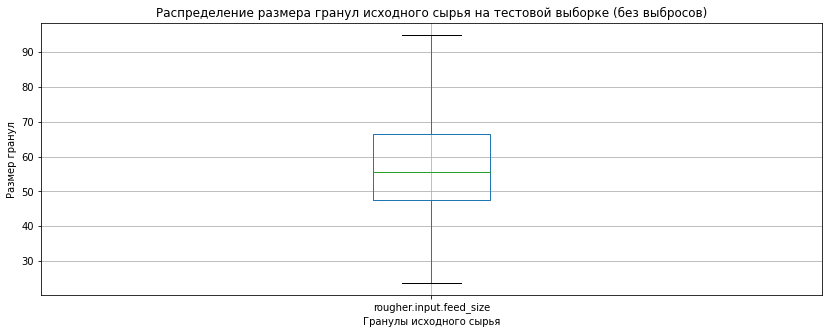

In [53]:
data_test.boxplot(column='rougher.input.feed_size', 
                  showfliers=False, figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title('Распределение размера гранул исходного сырья '
    'на тестовой выборке (без выбросов)')
plt.show()

<a name="seed_usual_hist"></a>
С помощью библиотеки `matplotlib.pyplot` отдельно визуализируем распределение размера гранул исходного сырья `rougher.input.feed_size` на обучающей и тестовой выборках одновременно:

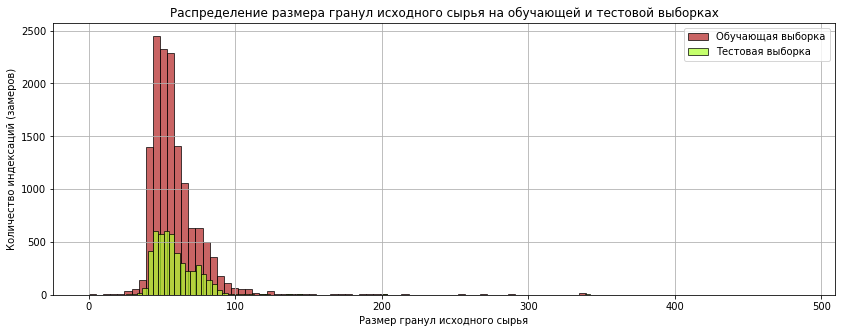

In [54]:
data_train['rougher.input.feed_size']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
      color='firebrick', edgecolor = 'black')

data_test['rougher.input.feed_size']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
      color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['Обучающая выборка', 
            'Тестовая выборка'])
plt.xlabel('Размер гранул исходного сырья')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение размера гранул исходного сырья '
          'на обучающей и тестовой выборках')
plt.show()

Так как мы имеем дело с непрерывной величиной, для анализа её распределения используем график распределения плотности *kde* (`sns.kdeplot`), вместо обычной гистограммы.

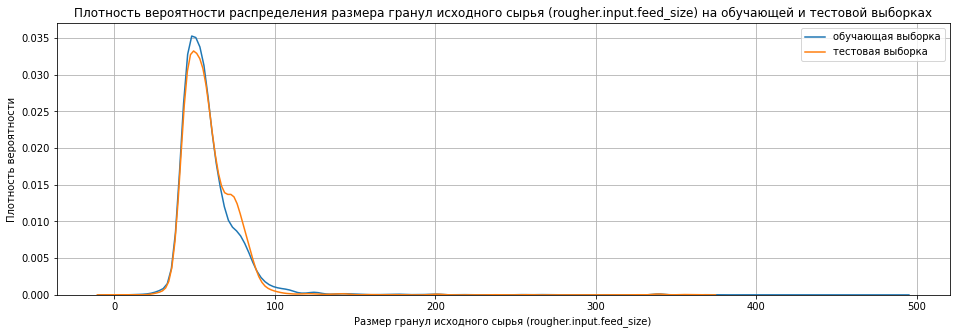

In [55]:
i = 'rougher.input.feed_size'
j = 'исходного сырья'
plt.figure(figsize=(16,5))
sns.kdeplot(x=data_train[i], label='обучающая выборка')
sns.kdeplot(x=data_test[i], label='тестовая выборка')
plt.legend()
plt.grid()
plt.xlabel('Размер гранул ' + j + ' (' + i + ')')
plt.ylabel('Плотность вероятности')
plt.title('Плотность вероятности распределения размера гранул ' + j + ' (' + i + ') на обучающей и тестовой выборках')
plt.show()

Распределения размеров гранул исходного сырья (медианы, "хвосты") на обучающей и тестовой выборках не сильно отличаются друг от друга. Отличается только количество замеров (видно на [обычной гистограмме](#seed_usual_hist)).

#### Вывод по п. 4.2
<a name="422"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**Распределение размеров гранул сырья**](#Распределение-размеров-гранул-сырья) изучены данные о гранулах исходного сырья.


В результате выполнения задач этого подраздела было выявлено следующее:
1. На диаграммах размаха по распределению размеров гранул исходного сырья `rougher.input.feed_size` на обучающей и тестовой выборках видны большие выбросы в верхней области. Распределение размеров гранул исходного сырья имеет положительную асимметрию (смещено вправо). 
2. Размер гранул исходного сырья в основном имеет значение в 50 $\div$ 55.
3. Распределения размеров гранул исходного сырья на обучающей и тестовой выборках не сильно отличаются друг от друга - что соответствует условиям задачи, а значит оценка модели будет правильной.

### Суммарная концентрация металлов на разных стадиях
<a name="43"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом, после первичной очистки и финальном концентратах.

In [56]:
# в сырье
data_train[rougher_input_feed].sum(1).head()

date
2016-01-15 00:00:00    51.680034
2016-01-15 01:00:00    50.659114
2016-01-15 02:00:00    50.609929
2016-01-15 03:00:00    51.061546
2016-01-15 04:00:00    47.859163
dtype: float64

In [57]:
# в черновом концентрате
data_train[rougher_output_concentrate].sum(1).head()

date
2016-01-15 00:00:00    66.424950
2016-01-15 01:00:00    67.012710
2016-01-15 02:00:00    66.103793
2016-01-15 03:00:00    65.752751
2016-01-15 04:00:00    65.908382
dtype: float64

In [58]:
# в концентрате после первичной очистки
data_train[primary_cleaner_output_concentrate].sum(1).head()

date
2016-01-15 00:00:00    72.640924
2016-01-15 01:00:00    72.543485
2016-01-15 02:00:00    72.095042
2016-01-15 03:00:00    59.957723
2016-01-15 04:00:00    71.321010
dtype: float64

In [59]:
# в финальном концентрате
data_train[final_output_concentrate].sum(1).head()

date
2016-01-15 00:00:00    63.644396
2016-01-15 01:00:00    63.957723
2016-01-15 02:00:00    64.311180
2016-01-15 03:00:00    63.573449
2016-01-15 04:00:00    64.004667
dtype: float64

Построим гистограммы для распределения суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом, после первичной очистки и финальном концентратах в обучающей выборке `gold_industry_train`.

Максимальные значения суммарной концентрации всех металлов в сырье, в черновом концентрате, после первичной очистки и финальном концентрате:

['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']: 76
['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']: 88
['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']: 78
['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']: 80


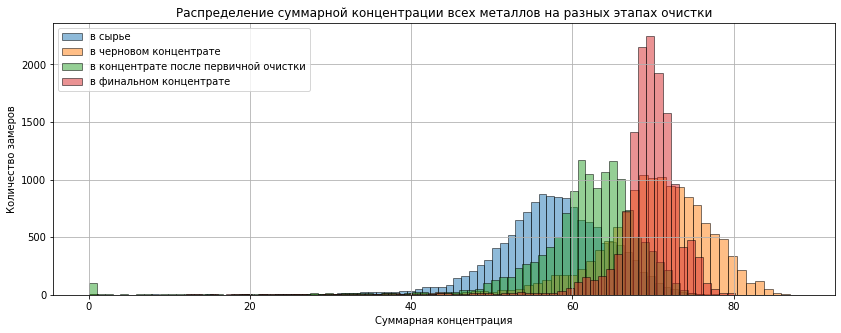

In [60]:
stages = [
    rougher_input_feed,
    rougher_output_concentrate,
    primary_cleaner_output_concentrate,
    final_output_concentrate,
]

print('\033[1m' + 'Максимальные значения суммарной концентрации всех металлов '
      'в сырье, в черновом концентрате, после первичной очистки '
      'и финальном концентрате:' + '\033[0m')
print()
    
max_concentration = 0
plt.figure(figsize=(14, 5))
plt.grid(True)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Количество замеров')
plt.title('Распределение суммарной концентрации всех металлов '
          'на разных этапах очистки')
for stage in stages:
    concentration = data_train[stage].sum(1)
    plt.hist(concentration, bins=80, alpha=0.5, edgecolor = 'black')
    plt.legend(['в сырье', 'в черновом концентрате', 
                'в концентрате после первичной очистки', 'в финальном концентрате'])
    max_concentraition = max(max_concentration, int(concentration.max()))
    print(f'{stage}:', max_concentraition)

Так как мы имеем дело с непрерывной величиной, то для анализа её распределения мы можем построить график распределения плотности *kde* (`sns.kdeplot`) вместо обычной гистограммы.

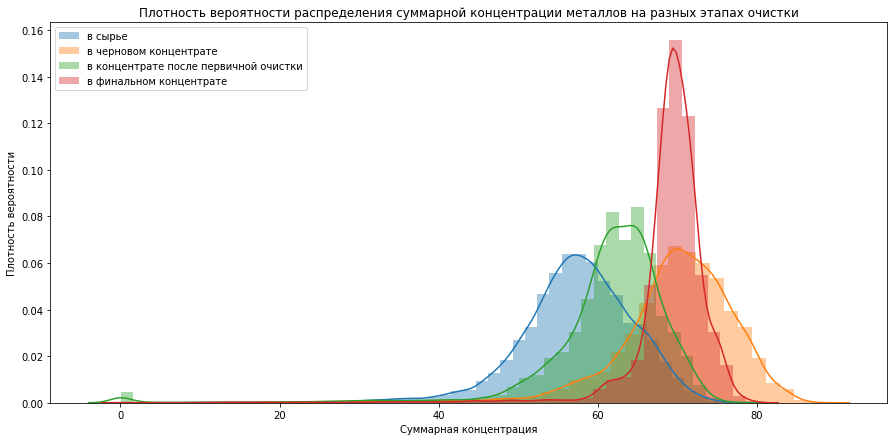

In [61]:
def all_stages_metalls_concentrate():

    plt.figure(figsize=(15,7))

    for i,j in zip(('rougher.input.feed_', 
                    'rougher.output.concentrate_', 
                    'primary_cleaner.output.concentrate_', 
                    'final.output.concentrate_'),                   
                    ('в сырье',
                     'в черновом концентрате',
                     'в концентрате после первичной очистки',
                     'в финальном концентрате')):

        sns.distplot(data_train[[i + 'au', i + 'ag', i + 'pb', i + 'sol']].sum(axis=1), label=j)

        plt.grid()
        plt.legend()
        plt.xlabel('Суммарная концентрация')
        plt.ylabel('Плотность вероятности')
        plt.title('Плотность вероятности распределения cуммарной концентрации '
                  'металлов на разных этапах очистки')
        
all_stages_metalls_concentrate()

Таблица средних значений изменений концентрации металлов [`concentrate_metal_table`](#concentrate_metal_table) и визуализация в виде гистограмм показывают нам, что суммарная концентрация всех металлов увеличивается с каждым этапом очистки, в основном, засчёт увеличения концентрации золота (`au`).

### Вывод
<a name="44"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Анализ данных**](#Анализ-данных) были выполнены следующие задачи:
1. Мы посмотрели, как меняется концентрация металлов (*Au*, *Ag*, *Pb*) на различных этапах очистки;
2. Сравнили распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Увидели, что распределения мало отличаются друг от друга, а значит оценка модели будет правильной;
3. Исследовали суммарную концентрацию всех металлов на разных стадиях: в сырье, в черновом, после первой очистки и финальном концентратах.


В результате выполнения задач этого раздела было выявлено следующее:
1. Таблица средних значений изменений концентрации металлов [`concentrate_metal_table`](#concentrate_metal_table) и визуализация распределения концентрации всех металлов на различных этапах очистки наглядно показывают, что средняя концентрация золота (`au`) и свинца (`pb`) возрастает после прохождения каждого этапа. Причём средняя концентрация золота в финале увеличивается более, чем в 5 раз. При этом, средняя концентрация серебра (`ag`), сначала повышается, а потом, наоборот, снижается и становится меньше исходной.
2. На диаграммах размаха по распределению размеров гранул исходного сырья `rougher.input.feed_size` на обучающей и тестовой выборках видны большие выбросы в верхней области. Распределение размеров гранул исходного сырья имеет положительную асимметрию (смещено вправо). 
3. Размер гранул исходного сырья в основном имеет значение в 50 $\div$ 55. 
5. Распределения размеров гранул исходного сырья на обучающей и тестовой выборках не сильно отличаются друг от друга, а значит оценка модели будет правильной, что соответствует условиям задачи.
6. Таблица средних значений изменений концентрации металлов [`concentrate_metal_table`](#concentrate_metal_table) и визуализация распределения суммарной концентрации всех металлов на разных этапах очистки показывает, что суммарная концентрация увеличивается на каждом этапе очистки, в основном, засчёт увеличения концентрации золота (`au`). При этом в распределении присутствуют аномальные значения концентраций, равные нулю (пик слева), которые мы удалили для улучшения работы модели.

## Обучение моделей
<a name="5"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Обучим разные модели, а также оценим их качество кросс-валидацией.

### Функция для вычисления *final_sMAPE*
<a name="51"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Напомним, что метрика *итоговое sMAPE*, или *final_sMAPE*, складывается из двух величин:

$$
final\_sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)
$$

Соответственно, создадим необходиные функции.

In [62]:
# функция расчета sMAPE
def smape_function(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / scale) * 100

In [63]:
# функция расчета final_sMAPE
def final_smape_function(rougher, final):
    score_final = 0.25 * rougher + 0.75 * final
    return score_final

Создадим собственную метрику оценки качества модели *sMAPE* с помощью функции `make_scorer()`. Здесь параметр `smape_function` - это функция для расчета *sMAPE*. Параметр `greater_is_better=False` означает, что чем меньше значение метрики *sMAPE*, тем лучше модель. Этот параметр будет возвращать отрицательное значение, которое можно будет потом умножить на -1.

In [64]:
smape_scorer = make_scorer(smape_function, greater_is_better=False)

### Разделение обучающей выборки на признаки и таргет
<a name="52"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Разделим обучающую выборку `gold_industry_train` на признаки `features_train` и таргет(целевой признак) `target_train`.

В переменной `features_train` сохраним только те признаки из обучающей выборки, которые присутствуют одновременно и в обучающей, и в тестовой выборках (т.е. без таргетов) и сбросим индекс.

In [65]:
features_train = data_train[features].reset_index(drop=True)

Выделим таргет `target_train` с целевыми признаками `rougher.output.recovery` и `final.output.recovery` из обучающего датасета `data_train` и сбросим индекс.

In [66]:
target_train = data_train[targets].reset_index(drop=True)

Признаки в обучающей выборке `gold_industry_train`.

In [67]:
features_train.head()

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
0               6.486150               6.100378               2.284912   
1               6.478583               6.161113               2.266033   
2               6.362222               6.116455               2.159622   
3               6.118189               6.043309               2.037807   
4               5.663707               6.060915               1.786875   

   rougher.input.feed_sol  rougher.input.feed_rate  rougher.input.feed_size  \
0               36.808594               523.546326                55.486599   
1               35.753385               525.290581                57.278666   
2               35.971630               530.026610                57.510649   
3               36.862241               542.590390                57.792734   
4               34.347666               540.531893                56.047189   

   rougher.input.floatbank10_sulfate  rougher.input.floatbank10_xanthate  \
0                          11.986616                            6.007990   
1                          11.971193                            6.005766   
2                          11.920603                            6.197377   
3                          11.630094                            6.203177   
4                          10.957755                            6.198826   

   rougher.state.floatbank10_a_air  rougher.state.floatbank10_a_level  \
0                       999.706909                        -404.066986   
1                      1000.286398                        -400.065196   
2                       999.719565                        -400.074028   
3                       999.814770                        -400.200179   
4                       999.678690                        -399.752729   

   rougher.state.floatbank10_b_air  rougher.state.floatbank10_b_level  \
0                      1603.011353                        -434.715027   
1                      1600.754587                        -449.953435   
2                      1599.337330                        -450.008530   
3                      1600.059442                        -450.619948   
4                      1600.208824                        -449.599614   

   rougher.state.floatbank10_c_air  rougher.state.floatbank10_c_level  \
0                      1602.375000                        -442.204468   
1                      1600.479580                        -449.830646   
2                      1599.672797                        -449.954491   
3                      1600.012842                        -449.910497   
4                      1600.357732                        -450.034364   

   rougher.state.floatbank10_d_air  rougher.state.floatbank10_d_level  \
0                      1598.937256                        -451.294128   
1                      1600.527589                        -449.953649   
2                      1599.849325                        -449.954185   
3                      1597.725177                        -450.130127   
4                      1599.759049                        -449.909799   

   rougher.state.floatbank10_e_air  rougher.state.floatbank10_e_level  \
0                      1404.472046                        -455.462982   
1                      1399.227084                        -450.869848   
2                      1399.180945                        -449.937588   
3                      1400.943157                        -450.030142   
4                      1401.560902                        -448.877187   

   rougher.state.floatbank10_f_air  rougher.state.floatbank10_f_level  \
0                      1416.354980                        -451.939636   
1                      1399.719514                        -450.119001   
2                      1400.316682                        -450.527147   
3                      1400.234743                        -449.790835   
4                      1401.160227                        -450.407

Для наглядности, выведем по отдельности целевые признаки `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в обучающей выборке `gold_industry_train`.

In [68]:
display(target_train.head())
display(target_train.iloc[:, 0].head())
display(target_train.iloc[:, 1].head())

rougher.output.recovery  final.output.recovery
0                87.107763              70.541216
1                86.843261              69.266198
2                86.842308              68.116445
3                87.226430              68.347543
4                86.688794              66.927016

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

0    70.541216
1    69.266198
2    68.116445
3    68.347543
4    66.927016
Name: final.output.recovery, dtype: float64

### `DecisionTreeRegressor` + `GridSearchCV`
<a name="53"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим модель **дерева решений *Decision Tree*** с функцией **`GridSearchCV`** для задачи регрессии.

#### Черновой концентрат
<a name="531"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В качестве целевого используем признак `rougher.output.recovery`, означающий эффективность обогащения **чернового концентрата**.

Для получения лучшей модели **дерева решений** можно использовать кросс-валидацию и автоматический подбор гиперпараметров с помощью функции `GridSearchCV`. Функция `GridSearchCV` самостоятельно делит выборку на обучающую и валидационную. В параметрах `GridSearchCV` указываем:
- саму модель;
- гиперпараметры (`parameters`);
- в `scoring` указываем метрику *sMAPE*, которую нам необходимо рассчитать, - `smape_scorer`;
- кроссвалидацию `cv=3`;
- параметр `n_jobs=-1`, чтобы в ходе вычислений были задействованы все доступные ядра процессора;
- когда итераций много, и на каждой информация выводиться не должна, применяют аргумент `verbose` (англ. «подробный»).

In [69]:
%%time

# построим модель дерева решений
model_dt_grid_rougher = DecisionTreeRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметром max_depth
parameters = {'max_depth': range (2, 10, 1)} 

# подберём гиперпараметры модели с помощью GridSearchCV
smape_score_dt_grid_rougher = GridSearchCV(model_dt_grid_rougher, 
                                           parameters, 
                                           scoring=smape_scorer, 
                                           cv=3, 
                                           n_jobs=-1, 
                                           verbose=3)

# затем обучим модель для целевого признака 'rougher.output.recovery'
# (индекс "0" у переменной target_train)
smape_score_dt_grid_rougher.fit(features_train, target_train.iloc[:, 0])

print('Best model DT+GridSearchCV для таргета "rougher":', 
      smape_score_dt_grid_rougher.best_estimator_)
print('Best params DT+GridSearchCV для таргета "rougher":', 
      smape_score_dt_grid_rougher.best_params_)
print('Best sMAPE DT+GridSearchCV для таргета "rougher":', 
      f'{abs(smape_score_dt_grid_rougher.best_score_):.2f}%')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ....................................max_depth=2; total time=   0.1s
[CV 2/3] END ....................................max_depth=2; total time=   0.1s
[CV 3/3] END ....................................max_depth=2; total time=   0.1s
[CV 1/3] END ....................................max_depth=3; total time=   0.2s
[CV 2/3] END ....................................max_depth=3; total time=   0.2s
[CV 3/3] END ....................................max_depth=3; total time=   0.2s
[CV 1/3] END ....................................max_depth=4; total time=   0.2s
[CV 2/3] END ....................................max_depth=4; total time=   0.2s
[CV 3/3] END ....................................max_depth=4; total time=   0.2s
[CV 1/3] END ....................................max_depth=5; total time=   0.3s
[CV 2/3] END ....................................max_depth=5; total time=   0.2s
[CV 3/3] END ....................................

Лучшая модель дерева решений **`DecisionTreeRegressor`** с `GridSearchCV` для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 6.68%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 7.

#### Финальный концентрат
<a name="532"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В качестве целевого используем признак `final.output.recovery`, означающий эффективность обогащения **финального концентрата**.

In [70]:
%%time

# построим модель дерева решений
model_dt_grid_final = DecisionTreeRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметром max_depth
parameters = {'max_depth': range (2, 10, 1)} 

# подберём гиперпараметры модели с помощью GridSearchCV
smape_score_dt_grid_final = GridSearchCV(model_dt_grid_final, 
                                         parameters, 
                                         scoring=smape_scorer, 
                                         cv=3, 
                                         n_jobs=-1, 
                                         verbose=3)

# затем обучим модель для целевого признака 'final.output.recovery'
# (индекс "1" у переменной target_train)
smape_score_dt_grid_final.fit(features_train, target_train.iloc[:, 1])

print('Best model DT+GridSearchCV для таргета "final":', 
      smape_score_dt_grid_final.best_estimator_)
print('Best params DT+GridSearchCV для таргета "final":', 
      smape_score_dt_grid_final.best_params_)
print('Best sMAPE DT+GridSearchCV для таргета "final":', 
      f'{abs(smape_score_dt_grid_final.best_score_):.2f}%')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ....................................max_depth=2; total time=   0.1s
[CV 2/3] END ....................................max_depth=2; total time=   0.1s
[CV 3/3] END ....................................max_depth=2; total time=   0.1s
[CV 1/3] END ....................................max_depth=3; total time=   0.1s
[CV 2/3] END ....................................max_depth=3; total time=   0.1s
[CV 3/3] END ....................................max_depth=3; total time=   0.1s
[CV 1/3] END ....................................max_depth=4; total time=   0.2s
[CV 2/3] END ....................................max_depth=4; total time=   0.2s
[CV 3/3] END ....................................max_depth=4; total time=   0.2s
[CV 1/3] END ....................................max_depth=5; total time=   0.2s
[CV 2/3] END ....................................max_depth=5; total time=   0.2s
[CV 3/3] END ....................................

Лучшая модель дерева решений **`DecisionTreeRegressor`** с `GridSearchCV` для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 9.61%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 2.

#### Итоговая метрика *final_sMAPE*
<a name="533"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Затем рассчитаем итоговую метрику оценки качества модели ***final_sMAPE*** **на обучающей выборке**.

In [71]:
final_dt_smape = abs(final_smape_function(smape_score_dt_grid_rougher.best_score_, smape_score_dt_grid_final.best_score_))

print('Final_sMAPE DT:', f'{final_dt_smape:.2f}%')

Final_sMAPE DT: 8.87%


Значение итоговой метрики оценки качества модели дерева решений **`DecisionTreeRegressor`**: 
- ***final_sMAPE = 8.87%***.

### `RandomForestRegressor` + `GridSearchCV`
<a name="54"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим модель **случайного леса *Random Forest*** с функцией **`GridSearchCV`** для задачи регрессии.

#### Черновой концентрат
<a name="541"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В качестве целевого, используем признак `rougher.output.recovery`, эффективность обогащения **чернового концентрата**.

In [72]:
%%time

# построим модель случайного леса
model_rf_grid_rougher = RandomForestRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметрами n_estimators и max_depth
parameters = {'n_estimators': range (100, 201, 20),
              'max_depth': range (2, 10, 1)}  

# подберём гиперпараметры модели с помощью функции GridSearchCV
smape_score_rf_grid_rougher = GridSearchCV(model_rf_grid_rougher, 
                                           parameters, 
                                           scoring=smape_scorer, 
                                           cv=3, 
                                           n_jobs=-1, 
                                           verbose=3)

# затем обучим модель для целевого признака 'rougher.output.recovery'
# (индекс "0" у переменной target_train)
smape_score_rf_grid_rougher.fit(features_train, target_train.iloc[:, 0])

print('Best model RF+GridSearchCV для таргета "rougher":', 
      smape_score_rf_grid_rougher.best_estimator_)
print('Best params RF+GridSearchCV для таргета "rougher":', 
      smape_score_rf_grid_rougher.best_params_)
print('Best sMAPE RF+GridSearchCV для таргета "rougher":', 
      f'{abs(smape_score_rf_grid_rougher.best_score_):.2f}%')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END ..................max_depth=2, n_estimators=100; total time=   5.9s
[CV 2/3] END ..................max_depth=2, n_estimators=100; total time=   5.8s
[CV 3/3] END ..................max_depth=2, n_estimators=100; total time=   5.9s
[CV 1/3] END ..................max_depth=2, n_estimators=120; total time=   7.3s
[CV 2/3] END ..................max_depth=2, n_estimators=120; total time=   7.4s
[CV 3/3] END ..................max_depth=2, n_estimators=120; total time=   7.3s
[CV 1/3] END ..................max_depth=2, n_estimators=140; total time=   8.6s
[CV 2/3] END ..................max_depth=2, n_estimators=140; total time=   8.8s
[CV 3/3] END ..................max_depth=2, n_estimators=140; total time=   8.7s
[CV 1/3] END ..................max_depth=2, n_estimators=160; total time=   9.7s
[CV 2/3] END ..................max_depth=2, n_estimators=160; total time=  10.2s
[CV 3/3] END ..................max_depth=2, n_e

Лучшая модель случайного леса **`RandomForestRegressor`** с `GridSearchCV` для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 6.54%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 5
- количество деревьев: `n_estimators` = 160

#### Финальный концентрат
<a name="542"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В качестве целевого используем признак `final.output.recovery`, эффективность обогащения **финального концентрата**.

In [73]:
%%time

# построим модель случайного леса
model_rf_grid_final = RandomForestRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметрами n_estimators и max_depth
parameters = {'n_estimators': range (100, 201, 20),
              'max_depth': range (2, 10, 1)} 

# подберём гиперпараметры модели с помощью функции GridSearchCV
smape_score_rf_grid_final = GridSearchCV(model_rf_grid_final, 
                                         parameters, 
                                         scoring=smape_scorer, 
                                         cv=3, 
                                         n_jobs=-1, 
                                         verbose=3)

# затем обучим модель для целевого признака 'final.output.recovery'
# (индекс "1" у переменной target_train)
smape_score_rf_grid_final.fit(features_train, target_train.iloc[:, 1])

print('Best model RF+GridSearchCV для таргета "final":', 
      smape_score_rf_grid_final.best_estimator_)
print('Best params RF+GridSearchCV для таргета "final":', 
      smape_score_rf_grid_final.best_params_)
print('Best sMAPE RF+GridSearchCV для таргета "final":', 
      f'{abs(smape_score_rf_grid_final.best_score_):.2f}%')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END ..................max_depth=2, n_estimators=100; total time=   6.6s
[CV 2/3] END ..................max_depth=2, n_estimators=100; total time=   6.7s
[CV 3/3] END ..................max_depth=2, n_estimators=100; total time=   6.7s
[CV 1/3] END ..................max_depth=2, n_estimators=120; total time=   7.6s
[CV 2/3] END ..................max_depth=2, n_estimators=120; total time=   8.1s
[CV 3/3] END ..................max_depth=2, n_estimators=120; total time=   8.2s
[CV 1/3] END ..................max_depth=2, n_estimators=140; total time=   9.5s
[CV 2/3] END ..................max_depth=2, n_estimators=140; total time=   9.3s
[CV 3/3] END ..................max_depth=2, n_estimators=140; total time=   9.4s
[CV 1/3] END ..................max_depth=2, n_estimators=160; total time=  10.3s
[CV 2/3] END ..................max_depth=2, n_estimators=160; total time=  10.2s
[CV 3/3] END ..................max_depth=2, n_e

Лучшая модель случайного леса **`RandomForestRegressor`** с `GridSearchCV` для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 9.42%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 2
- количество деревьев: `n_estimators` = 200

#### Итоговая метрика *final_sMAPE*
<a name="543"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Затем рассчитаем итоговую метрику оценки качества модели ***final_sMAPE*** **на обучающей выборке**.

In [74]:
final_rf_smape = abs(final_smape_function(smape_score_rf_grid_rougher.best_score_, smape_score_rf_grid_final.best_score_))

print('Final_sMAPE RF:', f'{final_rf_smape:.2f}%')

Final_sMAPE RF: 8.70%


Значение итоговой метрики оценки качества модели случайного леса **`RandomForestRegressor`**: 
- ***final_sMAPE = 8.70%***.

### `LinearRegression` + `cross_val_score`
<a name="55"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим модель **линейной регрессии *Linear Regression*** с функцией **`cross_val_score`**.

*Кросс-валидация* - это оценка качества модели на нескольких валидационных выборках (параметр `cv`). Мы получаем массив из таких оценок на `cv` частях. Необходимо оценивать модель по среднему значению этих оценок, поэтому мы берём среднее значение `.mean()` от полученного массива `smape_scores`.

Функция `cross_val_score` в ходе перекрёстной проверки обучает (строит) и оценивает полученную на входе необученную модель и выдаёт массив `smape_scores`. Это обучение нигде не сохраняется, как объект, поэтому мы не можем использовать его результат для прогноза (`predict`).

#### Черновой концентрат
<a name="551"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В качестве целевого используем признак `rougher.output.recovery`, эффективность обогащения **чернового концентрата**.

In [75]:
%%time
# построим модель линейной регрессии
model_lr_cross_rougher = LinearRegression()
# с функцией cross_val_score
smape_scores_lr_cross_rougher = cross_val_score(model_lr_cross_rougher, 
                                                features_train, 
                                                target_train.iloc[:, 0], 
                                                scoring = smape_scorer, 
                                                cv=5)

final_smape_scores_lr_cross_rougher = abs(smape_scores_lr_cross_rougher.mean())

print('Best sMAPE LR+cross_val_score для таргета "rougher":', 
      f'{final_smape_scores_lr_cross_rougher:.2f}%')

Best sMAPE LR+cross_val_score для таргета "rougher": 6.99%
CPU times: user 582 ms, sys: 834 ms, total: 1.42 s
Wall time: 1.36 s


Модель линейной регрессии **`LinearRegression`** с функцией `cross_val_score` для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 6.99%***.

#### Финальный концентрат
<a name="552"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В качестве целевого используем признак `final.output.recovery` - эффективность обогащения **финального концентрата**.

In [76]:
%%time
# построим модель линейной регрессии
model_lr_cross_final = LinearRegression()
# с функцией cross_val_score
smape_scores_lr_cross_final = cross_val_score(model_lr_cross_final, 
                                              features_train, 
                                              target_train.iloc[:, 1], 
                                              scoring = smape_scorer, 
                                              cv=5)

final_smape_scores_lr_cross_final = abs(smape_scores_lr_cross_final.mean())


print('Best sMAPE LR+cross_val_score для таргета "final":', 
      f'{final_smape_scores_lr_cross_final:.2f}%')

Best sMAPE LR+cross_val_score для таргета "final": 9.42%
CPU times: user 696 ms, sys: 1.01 s, total: 1.71 s
Wall time: 1.79 s


Модель линейной регрессии **`LinearRegression`** с функцией `cross_val_score` для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 9.42%***.

#### Итоговая метрика *final_sMAPE*
<a name="553"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Затем рассчитаем итоговую метрику оценки качества модели ***final_sMAPE*** **на обучающей выборке**.

In [77]:
final_lr_smape = abs(final_smape_function(final_smape_scores_lr_cross_rougher, final_smape_scores_lr_cross_final))

print('Final_sMAPE LR:', f'{final_lr_smape:.2f}%')

Final_sMAPE LR: 8.82%


Значение итоговой метрики оценки качества модели линейной регрессии **`LinearRegression`**: 
- ***final_sMAPE = 8.82%***.

### Сравнение моделей
<a name="56"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Создадим и выведем на экран таблицу `table` с метрикой оценки качества ***sMAPE*** для всех моделей и двух таргетов `rougher.output.recovery` и `final.output.recovery`.

In [78]:
table = pd.DataFrame([
    ['DecisionTreeRegressor + GridSearchCV', 
     f'{abs(smape_score_dt_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_dt_grid_final.best_score_):.2f}',
     f'{abs(final_dt_smape):.2f}'],
    ['RandomForestRegressor + GridSearchCV', 
     f'{abs(smape_score_rf_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_rf_grid_final.best_score_):.2f}',
     f'{abs(final_rf_smape):.2f}'],
    ['LinearRegression + cross_val_score', 
     f'{final_smape_scores_lr_cross_rougher:.2f}', 
     f'{final_smape_scores_lr_cross_final:.2f}',
     f'{abs(final_lr_smape):.2f}'],
],
columns=['model', 'sMAPE для чернового концентрата, %', 
         'sMAPE для финального концентрата, %', 'Итоговое sMAPE для модели, %'])


print('\033[1m' + 'Метрика оценки качества sMAPE для всех моделей '
      'и двух таргетов rougher и final' + '\033[0m')
table

Метрика оценки качества sMAPE для всех моделей и двух таргетов rougher и final


model sMAPE для чернового концентрата, %  \
0  DecisionTreeRegressor + GridSearchCV                               6.68   
1  RandomForestRegressor + GridSearchCV                               6.54   
2    LinearRegression + cross_val_score                               6.99   

  sMAPE для финального концентрата, % Итоговое sMAPE для модели, %  
0                                9.61                         8.87  
1                                9.42                         8.70  
2                                9.42                         8.82

Как мы помним, чем меньше значение метрики *sMAPE*, тем лучше модель. В полученных нами результатах значения *sMAPE* несильно, но различаются между собой.

Выберем в качестве лучшей модель **случайного леса `RandomForestRegressor`** с `GridSearchCV`, которая имеет следующие значения метрик оценки качества:
1. для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**):
    - ***sMAPE = 6.54%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 5
    - количество деревьев: `n_estimators` = 160
    

2. для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**):
    - ***sMAPE = 9.42%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 2
    - количество деревьев: `n_estimators` = 200
    
    
3. итоговое `sMAPE` на кросс-валидации и обучающей выборке:
    - ***final_sMAPE = 8.70%***

### Вывод
<a name="57"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Обучение моделей**](#Обучение-моделей) были выполнены следующие задачи:
1. Написана функция для вычисления итоговой метрики *final_sMAPE*;
2. Обучающая выборка разделена на признаки и таргет;
3. Обучено три модели `DecisionTreeRegressor`, `RandomForestRegressor` и `LinearRegression` с различными гиперпараметрами для двух целевых признаков:
    - `rougher.output.recovery` - эффективность обогащения чернового концентрата;
    - `final.output.recovery` - эффективность обогащения финального концентрата.
    
    
4. Построена общая таблица сравнения метрик.


В результате выполнения задач этого раздела в качестве лучшей выбрана модель случайного леса **`RandomForestRegressor`** с `GridSearchCV`, которая имеет следующие значения метрик оценки качества для двух целевых признаков:
1. для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**):
    - ***sMAPE = 6.54%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 5
    - количество деревьев: `n_estimators` = 160
    

2. для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**):
    - ***sMAPE = 9.42%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 2
    - количество деревьев: `n_estimators` = 200
    
    
3. итоговое `sMAPE` на кросс-валидации и обучающей выборке:
    - ***final_sMAPE = 8.70%***

## Тестирование лучшей модели
<a name="6"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проверим лучшую модель **случайного леса** **`RandomForestRegressor`** с `GridSearchCV` на тестовой выборке.

### Качество модели
<a name="61"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [Предобработка данных](#Предобработка-данных) мы уже разделили тестовую выборку `gold_industry_test` на признаки `features_test` и таргеты `target_test`:
- `features_test` - признаки в тестовой выборке `gold_industry_test`;
- `target_test` - переменная с целевыми признаками `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в тестовой выборке `gold_industry_test`, соответственно.

#### Черновой концентрат
<a name="611"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проведём проверку лучшей модели случайного леса **`RandomForestRegressor`** на тестовой выборке, для целевого признака `rougher.output.recovery` (эффективность обогащения **чернового концентрата**).

In [79]:
# получим предсказания модели случайного леса на тестовой выборке
predictions_test_rougher = pd.Series(
    smape_score_rf_grid_rougher.predict(features_test))

# рассчитаем метрику качества sMAPE
smape_test_rougher = abs(smape_function(
    target_test.iloc[:, 0], predictions_test_rougher))


print('Best sMAPE RF для таргета "rougher" test:', 
      f'{smape_test_rougher:.2f}%')

Best sMAPE RF для таргета "rougher" test: 3.92%


Лучшая модель случайного леса **`RandomForestRegressor`** для целевого признака `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 3.92%***.

#### Финальный концентрат
<a name="612"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проведём проверку лучшей модели случайного леса **`RandomForestRegressor`** на тестовой выборке для целевого признака `final.output.recovery` (эффективность обогащения **финального концентрата**).

In [80]:
# получим предсказания модели случайного леса на тестовой выборке
predictions_test_final = pd.Series(
    smape_score_rf_grid_final.predict(features_test))

# рассчитаем метрику качества sMAPE
smape_test_final = abs(smape_function(
    target_test.iloc[:, 1], predictions_test_final))


print('Best sMAPE RF для таргета "final" test:', 
      f'{smape_test_final:.2f}%')

Best sMAPE RF для таргета "final" test: 8.46%


Лучшая модель **случайного леса** **`RandomForestRegressor`** для целевого признака `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 8.46%***.

### Итоговая метрика *final_sMAPE*
<a name="62"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Затем рассчитаем итоговую метрику оценки качества модели ***final_sMAPE*** **на тестовой выборке**.

In [81]:
final_smape = abs(final_smape_function(smape_test_rougher, smape_test_final))

print('Final_sMAPE RF:', f'{final_smape:.2f}%')

Final_sMAPE RF: 7.33%


Значение итоговой метрики оценки качества модели случайного леса **`RandomForestRegressor`**: 
- ***final_sMAPE = 7.33%***.

### `DummyRegressor`
<a name="63"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проверим лучшую модель на адекватность **на тестовой выборке**.

#### Черновой концентрат
<a name="631"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проведём проверку лучшей модели на адекватность для целевого признака `rougher.output.recovery` (эффективность обогащения **чернового концентрата**).

In [82]:
model_dummy_rougher = DummyRegressor(strategy='median')
model_dummy_rougher.fit(features_train, target_train.iloc[:, 0]) 
predictions_dummy_rougher = pd.Series(
    model_dummy_rougher.predict(features_test))
smape_dummy_rougher = abs(smape_function(
    target_test.iloc[:, 0], predictions_dummy_rougher))


print('Наивный прогноз sMAPE для таргета "rougher":', 
      f'{smape_dummy_rougher:.2f}%')

Наивный прогноз sMAPE для таргета "rougher": 5.83%


Наивный прогноз метрики оценки качества константной модели **`DummyRegressor`** для целевого признака `rougher.output.recovery` (эффективности обогащения **чернового концентрата**) имеет значение:
- ***sMAPE = 5.83%***.

#### Финальный концентрат
<a name="632"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проведём проверку лучшей модели на адекватность для целевого признака `final.output.recovery` (эффективность обогащения **финального концентрата**).

In [83]:
model_dummy_final = DummyRegressor(strategy='median')
model_dummy_final.fit(features_train, target_train.iloc[:, 1]) 
predictions_dummy_final = pd.Series(
    model_dummy_final.predict(features_test))
smape_dummy_final = abs(smape_function(
    target_test.iloc[:, 1], predictions_dummy_final))


print('Наивный прогноз sMAPE для таргета "final":', 
      f'{smape_dummy_final:.2f}%')

Наивный прогноз sMAPE для таргета "final": 9.11%


Наивный прогноз метрики оценки качества константной модели **`DummyRegressor`** для целевого признака `final.output.recovery` (эффективности обогащения **финального концентрата**) имеет значение:
- ***sMAPE = 9.11%***.

### Итоговое сравнение моделей
<a name="64"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Дополним таблицу `table` новыми строками, затем выведем на экран.

In [84]:
table_add = pd.DataFrame([
    ['DecisionTreeRegressor + GridSearchCV', 
     f'{abs(smape_score_dt_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_dt_grid_final.best_score_):.2f}'],
    ['RandomForestRegressor + GridSearchCV', 
     f'{abs(smape_score_rf_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_rf_grid_final.best_score_):.2f}'],
    ['LinearRegression + cross_val_score', 
     f'{final_smape_scores_lr_cross_rougher:.2f}', 
     f'{final_smape_scores_lr_cross_final:.2f}'],
    ['RandomForestRegressor test', 
     f'{smape_test_rougher:.2f}', 
     f'{smape_test_final:.2f}'],
    ['RandomForestRegressor final_sMAPE', 
     f'{final_smape:.2f}', f'{final_smape:.2f}'],
    ['DummyRegressor', f'{smape_dummy_rougher:.2f}',
     f'{smape_dummy_final:.2f}'],
],
columns=['model', 'sMAPE для чернового концентрата, %', 
         'sMAPE для финального концентрата, %'])

table_add

model sMAPE для чернового концентрата, %  \
0  DecisionTreeRegressor + GridSearchCV                               6.68   
1  RandomForestRegressor + GridSearchCV                               6.54   
2    LinearRegression + cross_val_score                               6.99   
3            RandomForestRegressor test                               3.92   
4     RandomForestRegressor final_sMAPE                               7.33   
5                        DummyRegressor                               5.83   

  sMAPE для финального концентрата, %  
0                                9.61  
1                                9.42  
2                                9.42  
3                                8.46  
4                                7.33  
5                                9.11

### Вывод
<a name="65"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Тестирование лучшей модели**](#Тестирование-лучшей-модели) были выполнены следующие задачи:
1. Лучшая модель случайного леса **`RandomForestRegressor`** проверена на тестовой выборке для двух целевых признаков:
    - `rougher.output.recovery` - эффективность обогащения чернового концентрата;
    - `final.output.recovery` - эффективность обогащения финального концентрата.


2. Рассчитана итоговая метрика оценки качества модели *final_sMAPE*.
3. Лучшая модель проверена на адекватность для двух целевых признаков.
  

В результате выполнения задач этого раздела было выявлено следующее:
1. Лучшая модель случайного леса **`RandomForestRegressor`** на тестовой выборке имеет следующие значения метрик оценки качества для двух целевых признаков:
    - ***sMAPE = 3.92%*** - для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**);
    - ***sMAPE = 8.46%*** - для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**).


2. Значение итоговой метрики оценки качества модели случайного леса **`RandomForestRegressor`**: 
    - ***final_sMAPE = 7.33%***.
    

3. Наивный прогноз метрики оценки качества константной модели **`DummyRegressor`** имеет следующие значения для двух целевых признаков:
    - ***sMAPE = 5.83%*** - для таргета `rougher.output.recovery` (эффективности обогащения **чернового концентрата**);
    - ***sMAPE = 9.11%*** - для таргета `final.output.recovery` (эффективности обогащения **финального концентрата**).
    
    
4. Чем меньше значение метрики *sMAPE*, тем лучше модель. В полученных нами результатах значения *sMAPE* лучшей модели меньше значений *sMAPE* константной модели, поэтому модель можно считать адекватной.

## Общий вывод
<a name="7"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Мы провели исследование с целью построения модели машинного обучения, которая поможет прогнозировать коэффициент восстановления золота из золотосодержащей руды.

Получены входные данные с параметрами добычи и очистки, предоставленные компанией ["Цифра"](https://www.zyfra.com/ru/).

В разделе [**подготовки данных**](#Подготовка-данных) была изучена общая информация об обучающей и тестовой выборке, а также исходных данных. Затем выполнен расчёт эффективности обогащения - мы убедились в том, что эффективность обогащения рассчитана правильно. После этого проанализированы признаки, недоступные в тестовой выборке - в тестовом наборе нет целевых признаков, а также некоторые параметры в тестовой выборке замеряются и/или рассчитываются значительно позднее. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.
После выполнения предобработки данные стали подготовлены для обучения моделей. Также, было определено, что в проекте решается **задача регрессии.**

В разделе [**анализа данных**](#Анализ-данных) мы посмотрели, как меняется концентрация металлов (*Au*, *Ag*, *Pb*) на различных этапах очистки. Выявлено, что средняя концентрация золота (`au`) и свинца (`pb`) возрастает после прохождения каждого этапа. Причём средняя концентрация золота в финале увеличивается более, чем в 5 раз. При этом, средняя концентрация серебра (`ag`), сначала повышается, а потом, наоборот, снижается и становится меньше исходной.

Затем выполнено сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Видно, что распределения мало отличаются друг от друга, а значит оценка модели будет правильной;

После этого была исследована суммарная концентрация всех металлов на разных стадиях: в сырье, в черновом, после первой очистки и финальном концентратах. Выяснили, что суммарная концентрация увеличивается на каждом этапе очистки, в основном, засчёт увеличения концентрации золота (`au`).

В разделе [**обучения моделей**](#Обучение-моделей) была написана функция для вычисления итоговой метрики *final_sMAPE*, обучающая выборка была разделена на признаки и таргет. Затем мы построили и обучили три модели, а именно `DecisionTreeRegressor`, `RandomForestRegressor` и `LinearRegression` с различными гиперпараметрами для двух целевых признаков:
   - `rougher.output.recovery` - эффективность обогащения чернового концентрата;
   - `final.output.recovery` - эффективность обогащения финального концентрата.

В конце была построена и отображена общая таблица сравнения метрик.


В разделе [**тестирования лучшей модели**](#Тестирование-лучшей-модели) лучшая модель случайного леса **`RandomForestRegressor`** проверена на тестовой выборке для двух целевых признаков, рассчитана итоговая метрика оценки качества модели *final_sMAPE*, а также лучшая модель прошла проверку на адекватность для двух целевых признаков.


______________________ ______________________ ______________________
В ходе исследования удалось получить следующие результаты на **обучающей выборке**:

1. В качестве лучшей выбрана модель случайного леса **`RandomForestRegressor`** с `GridSearchCV`, которая имеет следующие значения метрик оценки качества для двух целевых признаков:
    - для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**):
        - ***sMAPE = 6.54%*** 

    при следующих параметрах:
        - глубина дерева: `max_depth` = 5
        - количество деревьев: `n_estimators` = 160
   
    +
    - для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**):
        - ***sMAPE = 9.42%*** 

    при следующих параметрах:
        - глубина дерева: `max_depth` = 2
        - количество деревьев: `n_estimators` = 200
   
    +
    - итоговое `sMAPE` на кросс-валидации и обучающей выборке:
        - ***final_sMAPE = 8.70%***


2. Лучшая модель случайного леса **`RandomForestRegressor` на тестовой выборке** имеет следующие значения метрик оценки качества для двух целевых признаков:
    - ***sMAPE = 3.92%*** - для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**);
    - ***sMAPE = 8.46%*** - для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**).


3. Значение итоговой метрики оценки качества модели случайного леса **`RandomForestRegressor` на тестовой выборке**: 
    - ***final_sMAPE = 7.33%***.
    

4. Наивный прогноз метрики оценки качества константной модели **`DummyRegressor` на тестовой выборке** имеет следующие значения для двух целевых признаков:
    - ***sMAPE = 5.83%*** - для таргета `rougher.output.recovery` (эффективности обогащения **чернового концентрата**);
    - ***sMAPE = 9.11%*** - для таргета `final.output.recovery` (эффективности обогащения **финального концентрата**).


Исходя из полученных результатов, можно сделать следующие **выводы**:
1. Лучшим прототипом модели машинного обучения для компании ["Цифра"](https://www.zyfra.com/ru/) является модель случайного леса **`RandomForestRegressor`** с применением функции `GridSearchCV`;
2. На тестовой выборке метрики оценки качества ***sMAPE*** модели случайного леса **`RandomForestRegressor`** имеют меньшие значения, по сравнению с полученными константной моделью **`DummyRegressor`**. На основании этого полученную модель можно считать адекватной.


**Общие рекомендации:**

1. Визуализация распределения целевых признаков имеет отрицательную асимметрию (смещено влево). Сложно сказать, подчиняется ли оно какому-либо стандартному закону. В этом случае, для увеличения точности работы модели можно собрать более полную выборку с дополнительными параметрами, возможно качественными, для повторной проверки модели.
2. Специалистам, занимающимся оптимизацией производства, можно рекомендовать использовать полученную модель, но желательно собрать более полную выборку с дополнительными параметрами (возможно качественными) для повторной проверки модели. В этом случае, если разница между значениями метрики *sMAPE* на тесте и константной модели будет ещё более значимой, можно также принимать решение о запуске предприятия.

Результаты исследования помогут оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

 ______________________ ______________________ ______________________
 
На этом мы заканчиваем - благодарим вас за внимание, надеемся, что наше исследование вам понравилось и поможет сделать правильные выводы, принять правильные решения.